# Reto Salesforce Predictive Modelling by WorkingData

# Carga de Datos

In [1]:
#Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode
import matplotlib.lines as lines
from scipy import stats
from scipy.special import boxcox1p
from scipy.stats import norm, skew

#Librerias para hacer uso de bokeh
from bokeh.plotting import figure
from bokeh.io import output_file, show
from bokeh.io import output_notebook
from bokeh.plotting import figure
from bokeh.models.widgets import Panel, Tabs
from bokeh.plotting import ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.transform import factor_cmap

#Librerias para modelos machine learning
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC
from sklearn.feature_selection import f_regression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

Procedemos a crearnos un diccionario con el que indicamos la forma adecuada de parsear los datos.

In [2]:
datatype = {'Ind_Prod_01':str, 'Ind_Prod_02':str, 'Ind_Prod_03':str, 'Ind_Prod_04':str, 'Ind_Prod_05':str, 'Ind_Prod_06':str,
            'Ind_Prod_07':str, 'Ind_Prod_08':str, 'Ind_Prod_09':str, 'Ind_Prod_10':str, 'Ind_Prod_11':str, 'Ind_Prod_12':str,
            'Ind_Prod_13':str, 'Ind_Prod_14':str, 'Ind_Prod_15':str, 'Ind_Prod_16':str, 'Ind_Prod_17':str, 'Ind_Prod_18':str,
            'Ind_Prod_19':str, 'Ind_Prod_20':str, 'Ind_Prod_21':str, 'Ind_Prod_22':str, 'Ind_Prod_23':str, 'Ind_Prod_24':str,
            'Socio_Demo_01':str, 'Socio_Demo_02':str, 'Imp_Cons_01':float, 'Imp_Cons_02':float, 'Imp_Cons_03':float, 'Imp_Cons_04':float,
            'Imp_Cons_05':float, 'Imp_Cons_06':float, 'Imp_Cons_07':float, 'Imp_Cons_08':float, 'Imp_Cons_09':float, 'Imp_Cons_10':float,
            'Imp_Cons_11':float, 'Imp_Cons_12':float, 'Imp_Cons_13':float, 'Imp_Cons_14':float, 'Imp_Cons_15':float, 'Imp_Cons_16':float,
            'Imp_Cons_17':float, 'Imp_Sal_01':float, 'Imp_Sal_02':float, 'Imp_Sal_03':float, 'Imp_Sal_04':float, 'Imp_Sal_05':float,
            'Imp_Sal_06':float, 'Imp_Sal_07':float, 'Imp_Sal_08':float, 'Imp_Sal_09':float, 'Imp_Sal_10':float, 'Imp_Sal_11':float,
            'Imp_Sal_12':float, 'Imp_Sal_13':float, 'Imp_Sal_14':float, 'Imp_Sal_15':float, 'Imp_Sal_16':float, 'Imp_Sal_17':float,
            'Imp_Sal_18':float, 'Imp_Sal_19':float, 'Imp_Sal_20':float, 'Imp_Sal_21':float, 'Num_Oper_01':int, 'Num_Oper_02':int,
            'Num_Oper_03':int, 'Num_Oper_04':int, 'Num_Oper_05':int, 'Num_Oper_06':int, 'Num_Oper_07':int, 'Num_Oper_08':int,
            'Num_Oper_09':int, 'Num_Oper_10':int, 'Num_Oper_11':int, 'Num_Oper_12':int, 'Num_Oper_13':int, 'Num_Oper_14':int,
            'Num_Oper_15':int, 'Num_Oper_16':int, 'Num_Oper_17':int, 'Num_Oper_18':int, 'Num_Oper_19':int, 'Num_Oper_20':int,
            'Socio_Demo_03':float, 'Socio_Demo_04':int, 'Socio_Demo_05':int, 'Poder_Adquisitivo': float}

datatype_test = {'Ind_Prod_01':str, 'Ind_Prod_02':str, 'Ind_Prod_03':str, 'Ind_Prod_04':str, 'Ind_Prod_05':str, 'Ind_Prod_06':str,
            'Ind_Prod_07':str, 'Ind_Prod_08':str, 'Ind_Prod_09':str, 'Ind_Prod_10':str, 'Ind_Prod_11':str, 'Ind_Prod_12':str,
            'Ind_Prod_13':str, 'Ind_Prod_14':str, 'Ind_Prod_15':str, 'Ind_Prod_16':str, 'Ind_Prod_17':str, 'Ind_Prod_18':str,
            'Ind_Prod_19':str, 'Ind_Prod_20':str, 'Ind_Prod_21':str, 'Ind_Prod_22':str, 'Ind_Prod_23':str, 'Ind_Prod_24':str,
            'Socio_Demo_01':str, 'Socio_Demo_02':str, 'Imp_Cons_01':float, 'Imp_Cons_02':float, 'Imp_Cons_03':float, 'Imp_Cons_04':float,
            'Imp_Cons_05':float, 'Imp_Cons_06':float, 'Imp_Cons_07':float, 'Imp_Cons_08':float, 'Imp_Cons_09':float, 'Imp_Cons_10':float,
            'Imp_Cons_11':float, 'Imp_Cons_12':float, 'Imp_Cons_13':float, 'Imp_Cons_14':float, 'Imp_Cons_15':float, 'Imp_Cons_16':float,
            'Imp_Cons_17':float, 'Imp_Sal_01':float, 'Imp_Sal_02':float, 'Imp_Sal_03':float, 'Imp_Sal_04':float, 'Imp_Sal_05':float,
            'Imp_Sal_06':float, 'Imp_Sal_07':float, 'Imp_Sal_08':float, 'Imp_Sal_09':float, 'Imp_Sal_10':float, 'Imp_Sal_11':float,
            'Imp_Sal_12':float, 'Imp_Sal_13':float, 'Imp_Sal_14':float, 'Imp_Sal_15':float, 'Imp_Sal_16':float, 'Imp_Sal_17':float,
            'Imp_Sal_18':float, 'Imp_Sal_19':float, 'Imp_Sal_20':float, 'Imp_Sal_21':float, 'Num_Oper_01':int, 'Num_Oper_02':int,
            'Num_Oper_03':int, 'Num_Oper_04':int, 'Num_Oper_05':int, 'Num_Oper_06':int, 'Num_Oper_07':int, 'Num_Oper_08':int,
            'Num_Oper_09':int, 'Num_Oper_10':int, 'Num_Oper_11':int, 'Num_Oper_12':int, 'Num_Oper_13':int, 'Num_Oper_14':int,
            'Num_Oper_15':int, 'Num_Oper_16':int, 'Num_Oper_17':int, 'Num_Oper_18':int, 'Num_Oper_19':int, 'Num_Oper_20':int,
            'Socio_Demo_03':float, 'Socio_Demo_04':int, 'Socio_Demo_05':int}

Tras esto procedemos a realizar la carga de los datos

In [3]:
df_ini = pd.read_csv('TRAIN.txt', dtype = datatype, low_memory = False)
df_test = pd.read_csv('TEST.txt', dtype = datatype_test, low_memory = False)
test_ID = df_test['ID_Customer'] # Guardamos para hacer el Test_Mission.txt
df_test = df_test.drop('ID_Customer', axis = 1)

A continuación vamos a proceder a realizar el casteo adecuado de las variables, esto se hace con el objetivo de optimizar la ocupación de memoria

In [4]:
def mem_usage(pandas_obj):
    '''Función que nos permite conocer la cantidad de memoria usada'''
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)

In [5]:
#Indicamos que nos aporte una información profunda sobre el uso de memoria
df_ini.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363834 entries, 0 to 363833
Data columns (total 89 columns):
ID_Customer          363834 non-null object
Imp_Cons_01          363834 non-null float64
Imp_Cons_02          363834 non-null float64
Imp_Cons_03          363834 non-null float64
Imp_Cons_04          363834 non-null float64
Imp_Cons_05          363834 non-null float64
Imp_Cons_06          363834 non-null float64
Imp_Cons_07          363834 non-null float64
Imp_Cons_08          363834 non-null float64
Imp_Cons_09          363834 non-null float64
Imp_Cons_10          363834 non-null float64
Imp_Cons_11          363834 non-null float64
Imp_Cons_12          363834 non-null float64
Imp_Cons_13          363834 non-null float64
Imp_Cons_14          363834 non-null float64
Imp_Cons_15          363834 non-null float64
Imp_Cons_16          363834 non-null float64
Imp_Cons_17          363834 non-null float64
Imp_Sal_01           363834 non-null float64
Imp_Sal_02           363834 non-nul

In [6]:
#Conociendo el gasto de memoria de cada uno de los bloques
for dtype in ['float','int','object']:
    selected_dtype = df_ini.select_dtypes(include=[dtype])
    mean_usage_b = selected_dtype.memory_usage(deep=True).mean()
    mean_usage_mb = mean_usage_b / 1024 ** 2
    print("Average memory usage for {} columns: {:03.2f} MB".format(dtype,mean_usage_mb))

Average memory usage for float columns: 2.71 MB
Average memory usage for int columns: 2.66 MB
Average memory usage for object columns: 22.02 MB


In [7]:
#Hacemos una conversión de las variables enteras y de las tipo float
df_int = df_ini.select_dtypes(include=['int'])
converted_int = df_int.apply(pd.to_numeric,downcast='unsigned')

df_float = df_ini.select_dtypes(include=['float'])
converted_float = df_float.apply(pd.to_numeric,downcast='float')

optimized_df = df_ini.copy()

optimized_df[converted_int.columns] = converted_int
optimized_df[converted_float.columns] = converted_float
print(mem_usage(df_ini))
print(mem_usage(optimized_df))

788.67 MB
682.84 MB


Podemos ver que tras realizar el casteo, pasamos a ocupar una menor memoria, ahora vamos a tratar las variables categoricas.

In [8]:
#En primer lugar vamos echar un vistazo a nuestras variables de tipo objetc
df_object = df_ini.select_dtypes(include=['object']).copy()
df_object.describe()

,ID_Customer,Ind_Prod_01,Ind_Prod_02,Ind_Prod_03,Ind_Prod_04,Ind_Prod_05,Ind_Prod_06,Ind_Prod_07,Ind_Prod_08,Ind_Prod_09,...,Ind_Prod_17,Ind_Prod_18,Ind_Prod_19,Ind_Prod_20,Ind_Prod_21,Ind_Prod_22,Ind_Prod_23,Ind_Prod_24,Socio_Demo_01,Socio_Demo_02
count,363834,363834,363834,363834,363834,363834,363834,363834,363834,363834,...,363834,363834,363834,363834,363834,363834,363834,363834,363224,363834
unique,363834,2,3,3,3,3,3,3,2,3,...,2,3,3,3,3,3,3,3,508,2
top,TR096257,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,2,09991,1
freq,1,342462,346607,335596,357372,320219,362778,355779,295291,316624,...,356805,362787,363740,363392,327740,353551,349244,240706,105895,222254


Podemos ver como tenemos un total de 27 columnas categóricas entre las que se encuentra, la variable ID_Customer, esta variable tiene por objetivo identificar al cliente, toma tantos valores diferentes como dimensión tiene nuestro dataframe por lo que no tenemos clientes duplicados, puesto que esta variable no aporta ningún tipo de información vamos a proceder a eliminarla.

In [9]:
df_object = df_object.drop('ID_Customer', axis = 1)
df_ini = df_ini.drop('ID_Customer', axis = 1)

In [10]:
#A continuación pasamos las variables a tipo categóricas con el fin de optimizar la memoria
converted_obj = pd.DataFrame()

for col in df_object.columns:
    num_unique_values = len(df_object[col].unique())
    num_total_values = len(df_object[col])
    if num_unique_values / num_total_values < 0.5:
        converted_obj.loc[:,col] = df_object[col].astype('category')
    else:
        converted_obj.loc[:,col] = df_object[col]


optimized_df[converted_obj.columns] = converted_obj

In [11]:
#Nos creamos en df una copia del dataframa a optimizar
df = optimized_df.copy()
print('memoria usada tras castear los str como categóricas')
mem_usage(df)

memoria usada tras castear los str como categóricas


'98.25 MB'

Podemos ver como hemos reducido de forma muy clara la memoria usada.

# Análisis Exploratorio de los datos

El objetivo de este análisis no es otro que comprender la relación que existe entre nuestro predictores y nuestra respuesta. Esto será fundamental, ya que de esta forma vamos a poder comprender mejor los datos, y podremos detectar posibles iteraciones entre variables, importancia de cada variable, etc.

## Valores perdidos

 En  primer lugar vamos a proceder a realizar un análisis de los valores perdidos de cada una de nuestras variables. Esto es bastante importante, ya que si disponemos de variables con un gran número de valores perdidos puede implicar una reducción del tamaño de nuestro conjunto de datos. Para ello procedemos a calcular el porcentaje de valores perdidos en cada variable y procedemos a ordenarlo de forma descendente.

In [12]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
Socio_Demo_01,610,0.001677
Poder_Adquisitivo,0,0.000000
Imp_Sal_15,0,0.000000
Imp_Sal_06,0,0.000000
Imp_Sal_07,0,0.000000


En este caso estamos ante un conjunto de datos donde solo tenemos una variable con valores perdidos, se trata de la variable Socio_Demo_01, y con una cantidad de valores perdidos igual a 610, o un porcentaje muy pequeño. Puesto que esta variable se trata de una variable categórica las técnicas que tenemos para poder rellenarla se reduce bastante,una posible opción sería sustituirla por la categoría más frecuente, aunque esto podría introducir información al modelo no correcta. La decisión de que hacer con esta variable a la hora de tratar las observaciones con valores perdidos es algo que se resolverá más adelante.

## Análisis de inferencia 

El objetivo de este análisis no es otro que comprender la relación que existe entre nuestro predictores y nuestra respuesta. Esto será fundamental, ya que de esta forma vamos a poder comprender mejor los datos, y podremos detectar posibles iteraciones entre variables, importancia de cada variable, etc.

Para comenzar vamos a proceder a mostrar una descripción estadística de nuestra variable a predecir, es decir, del Poder_Adquisitivo.

In [13]:
print(df['Poder_Adquisitivo'].describe())

count    3.638340e+05
mean     1.642141e+04
std      2.436773e+04
min      3.600960e+03
25%      9.300932e+03
50%      1.292517e+04
75%      1.894854e+04
max      5.040000e+06
Name: Poder_Adquisitivo, dtype: float64


Este nos muestra una serie de conclusiones interesantes:
    
1. En primer lugar tenemos una desviación estándar de 24367€, es decir, en promedio nos estamos desviando de la media en 24367€. En otras palabras, de las personas que no cobran el valor medio hay una diferencia de 24367€, sin lugar a dudas se trata de un valor muy muy elevado.
2. Podemos ver también que tenemos un poder adquisitivo máximo de 5 millones de euros, y un salario mínimo de 3600€, es decir la diferencia entre el salario máximo y mínimo es abismal.
3. Por otro lado podemos ver que el 50% de las personas tiene un poder adquisitivo inferior a 12925€, es decir, el 50% de las personas se encuentra por debajo del salario medio, es decir, todo parece indicar que estamos ante una situación de desequilibrio económico.

### Curva de Lorenz, diferenciando clases sociales

Los datos mostrados en el apartado anterior nos indica que estamos ante un conjunto de datos donde el poder adquisitivo esta repartido de forma desigual, para ver esto de una forma más clara vamos a proceder a mostrar la curva de Lorenz de la variable poder adquisitivo. La curva de Lorenz es una representación gráfica de la desigualdad en el reparto de la renta existente en un determinado territorio. En ella, se sitúa en el eje X los acumulados de población expresados en tanto por ciento y en el eje Y los acumulados de renta expresados en tanto por ciento. También vamos a acompañar a nuestra curva de Lorenz del valor del índice Gini, este índice toma un valor entre 0 y 1, si toma el valor 0 indica que el poder adquisitivo está totalmente equilibrado, mientras que un valor de 1 indica que una sola persona acapara todo el poder adquisitivo.

In [14]:
def curva_lorenz(df, col):
    '''Función que nos retorna los valores para representar la curva de lorenz'''
    porcentaje_poder_adquisitivo = []
    np_pa = np.sort(df[col].values)
    porcentaje_poblacion = np.arange(0,1.05,0.05)
    for i in np.arange(0,1.05,0.05):
        acumulado = np.sum(np_pa[0:int(np.round(df.shape[0]*i))])
        porcentaje_poder_adquisitivo.append((acumulado/np.sum(np_pa))*100)
    return(porcentaje_poblacion, porcentaje_poder_adquisitivo)

def gini(array):
    """Función que calcula el índice de Gini de un numpy array."""
    array = array.flatten()
    if np.amin(array) < 0:
        # Los valores no pueden ser negativos
        array -= np.amin(array)
    # Los valores no deben de ser cero:
    array += 0.0000001
    # Ordenamos los valores:
    array = np.sort(array)
    # índice de cada uno de los elemenos:
    index = np.arange(1,array.shape[0]+1)
    # Calculamos el número total de elementos:
    n = array.shape[0]
    # Retornamos el coeficiente de Gini:
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array)))

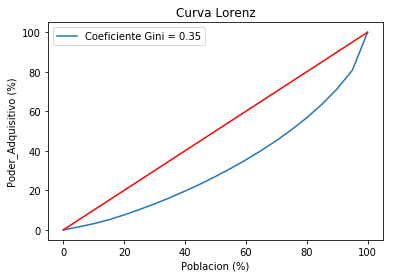

In [15]:
#Representamos la curva de Lorenz
coeficiente_gini = gini(df['Poder_Adquisitivo'].values)
porcentaje_poblacion, porcentaje_poder_adquisitivo = curva_lorenz(df, 'Poder_Adquisitivo')
plt.plot(porcentaje_poblacion*100, porcentaje_poder_adquisitivo, label = 'Coeficiente Gini = %.2f'%coeficiente_gini)
plt.plot(range(101), color = 'red')
plt.xlabel('Poblacion (%)')
plt.ylabel('Poder_Adquisitivo (%)')
plt.title('Curva Lorenz')
plt.legend()
plt.show()

In [16]:
porcentaje_poder_adquisitivo

[0.0,
 1.465269923210144,
 3.1397998332977295,
 5.1517561078071594,
 7.5672753155231476,
 10.278254747390747,
 13.16053718328476,
 16.273865103721619,
 19.625601172447205,
 23.192974925041199,
 26.999980211257935,
 31.067824363708496,
 35.418701171875,
 40.090540051460266,
 45.141607522964478,
 50.649452209472656,
 56.723904609680176,
 63.541281223297119,
 71.367841958999634,
 80.764484405517578,
 100.0]

La línea roja muesta lo que sería una sociedad con un poder adquisitivo ideal, es decir, todos los ciudadanos de un población tendrían el mismo poder adquisitivo. La línea azul muestra la curva de Lorenz de nuestro conjunto de datos, cuanto mayor área exista entre la curva y la recta mayor es la desigualdad de nuestra población. De esta gráfico podemos sacar las siguiente conclusión:

1. El 80% de la población unicamente dispone de un total del 56% del poder adquisitivo total, es decir, tenemos un que tan solo el 20% de la población dispone de un poder adquisitivo del 44%. 

2. El 95% de la población dispone aproximadamente del 80% del poder adquisitivo, es decir, un 5% de nuestra población dispone del 20% del poder adquisitivo, claro indicador de que estamos ante una situación de poder adquisitivo desigualitario.

3. Tenemos un coeficiente de Gini de 0.35, esto parece contradictorio, ya que el indice de gini debido al gran desequilibrio salarial todo hace indicar que debería ser mayor.

A continuación vamos a proceder a calcular el coeficiente de Skewness, esta índice nos indicará como de sesgada está nuestra población.

In [17]:
print("Skewness: %f" % df['Poder_Adquisitivo'].skew())

Skewness: 55.919865


Esta forma de calcular el índice de Skewness es útil cuando estamos tratando con una población total, puesto que estamos tratando con un subconjunto de la población total vamos a proceder a calcular el índice de Skewness muestral.

In [18]:
print(np.sqrt((df.shape[0])*(df.shape[0]-1))/(df.shape[0]-2) *  df['Poder_Adquisitivo'].skew())

55.9200951999


Ahora vamos a proceder a calcular el índice de Kurtosis

In [19]:
print("Kurtosis: %f" % df['Poder_Adquisitivo'].kurt())

Kurtosis: 7106.468750


Podemos ver que tenemos un valor de Kurtosis extremadamente elevado, esto nos indica que la mayor parte de la varianza de nuestros datos, se debe a desviaciones extremas infrecuentes, es decir, tenemos gente con un elevado poder adquisitivo que está provocando que nuestra desviación estándar sea tan elevada, para corroborar esto vamos a proceder a mostrar la función densidad de kernel. Debido al alto valor que tenemos de en el coeficiente de Skewness vamos a proceder a representar el valor logaritmo del Poder Adquisitivo.

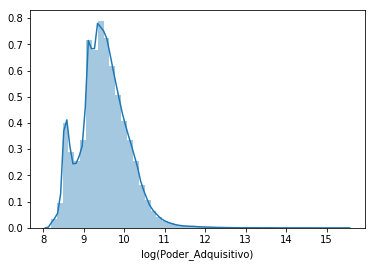

In [20]:
sns.distplot(np.log(df['Poder_Adquisitivo'].values))
plt.xlabel('log(Poder_Adquisitivo)')
plt.show()

En este gráfica se puede apreciar el sesgo ya que podemos ver una larga cola izquierda, es decir, gente con un alto poder adquisitivo.  Por otro lado podemos observar que estamos ante una KDE bimodal, es decir, esto podría significar que estamos tratando con dos tipos de poblaciones o grupos.

Visto este análisis podemos llegar a la conclusión de que estamos trabajando con dos grupos:

1. Un alto porcentaje de las personas que disponen de un poder adquisitivo reducido.

2. Y un reducido grupo de personas que poseen un poder adquisitivo elevado.

Debido a esta situación se ha optado por crearnos una nueva etiqueta en los datos, esta etiqueta se le denominará clase social, y tomará en principio dos posibles valores: clase baja y clase alta, para diferenciar al grupo de personas que tienen un alto poder adquisitivo y un bajo poder adquisitivo.

In [21]:
#Calculamos los percentiles 
percentiles = np.array([2.5, 25, 50, 75, 80, 97.5])
ptiles_poderadquisitivo = np.percentile(df['Poder_Adquisitivo'].values, percentiles)
print(ptiles_poderadquisitivo)

[  4994.81218262   9300.93237305  12925.17333984  18948.53759766
  21056.28828125  44482.17988281]


Todas las personas que se encuentren por un valor por debajo de 21056€ les vamos asignar la etiqueta clase baja y a las personas que tengan un valor por encima les vamos a asignar la etiqueta clase alta. Estas dos etiquetas las vamos a codificar con 0 para clase baja y 1 para clase alta. Hemos decidido pegar este corte debido a que la curva de Lorenz nos indicaba que un 80% de la población tenía un 56% del poder adquisitivo.

In [22]:
#Asignamos las etiquetas
df['Clase_Social'] = np.where(df['Poder_Adquisitivo']<= ptiles_poderadquisitivo[4], 0, 1)

Ahora procedemos a realizar el mismo análisis anterior para cada de una las clases.

count    291067.000000
mean      11643.588867
std        4325.641602
min        3600.959961
25%        8507.720215
50%       11390.849609
75%       14786.509766
max       21056.160156
Name: Poder_Adquisitivo, dtype: float64
Skewness: 0.218380
Kurtosis: -0.822469


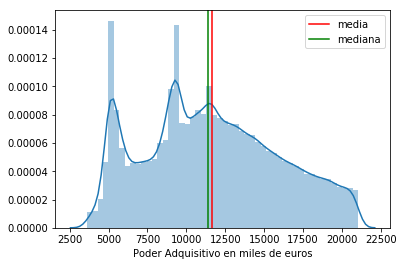

In [23]:
#Clase de bajo poder adquisitivo
df_grupo0 = df[df['Clase_Social'] == 0]
print(df_grupo0['Poder_Adquisitivo'].describe())
#Calculamos los coeficientes de skewness y Kurtosis
print("Skewness: %f" % df_grupo0['Poder_Adquisitivo'].skew())
print("Kurtosis: %f" % df_grupo0['Poder_Adquisitivo'].kurt())
sns.distplot(df_grupo0['Poder_Adquisitivo'].values)
plt.axvline(np.mean(df_grupo0['Poder_Adquisitivo'].values), color = 'red', label = 'media')
plt.axvline(np.median(df_grupo0['Poder_Adquisitivo'].values), color = 'green', label = 'mediana')
plt.xlabel('Poder Adquisitivo en miles de euros')
plt.legend()
plt.show()

Para esta clase social podemos observar claramente como la mayor porte de la población se aglutina en torno a los 6000€ de poder adquisitivo, tras esto la cantidad de gente que se encuentra entre 6000€ y 10000€ es menor, luego tenemos otro pico entorno a los 10000€ para finalmente ir decreciendo la cantidad de gente que tiene un salario superior a los 10000€.

Ahora vamos a proceder a calcular la curva de Lorenz y el índice de Gini para este subconjunto.

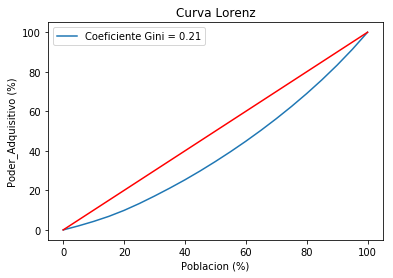

In [24]:
#Representamos la curva de Lorenz
coeficiente_gini = gini(df_grupo0['Poder_Adquisitivo'].values)
porcentaje_poblacion, porcentaje_poder_adquisitivo = curva_lorenz(df_grupo0, 'Poder_Adquisitivo')
plt.plot(porcentaje_poblacion*100, porcentaje_poder_adquisitivo, label = 'Coeficiente Gini = %.2f'%coeficiente_gini)
plt.plot(range(101), color = 'red')
plt.xlabel('Poblacion (%)')
plt.ylabel('Poder_Adquisitivo (%)')
plt.title('Curva Lorenz')
plt.legend()
plt.show()

Podemos ver como en este caso estamos ante una clase social más equitativa, el area entre la curva y la recta ideal es menor, además esto queda corroborado ya que el índice de Gini es más pequeño. 

Ahora vamos a proceder el mismo análisis para la clase social que hemos etiquetado como clase alta 

In [25]:
#Clase de alto poder adquisitivo
df_grupo1 = df[df['Clase_Social'] == 1]
print(df_grupo1['Poder_Adquisitivo'].describe())
#Calculamos los coeficientes de skewness y Kurtosis
print("Skewness: %f" % df_grupo1['Poder_Adquisitivo'].skew())
print("Kurtosis: %f" % df_grupo1['Poder_Adquisitivo'].kurt())

count    7.276700e+04
mean     3.553263e+04
std      4.937160e+04
min      2.105648e+04
25%      2.386976e+04
50%      2.781255e+04
75%      3.501391e+04
max      5.040000e+06
Name: Poder_Adquisitivo, dtype: float64
Skewness: 32.409943
Kurtosis: 2055.445557


Los primeros resultados no son muy alentadores, ya que podemos ver que entre esta clase social sigue existiendo un gran desequilibrio económico. Podemos ver que tenemos una media de 35532€ y una desviación de 49370€, esto sigue siendo muy elevado. Además el elevado valor del índice de Skewness y la diferencia entre la media y la mediana nos indica que nuestra distribución es asimétrica. Finalmente el elevado índice de Kurtosis nos indica que la cola de la derecha es muy alargada, esto nos indica que la desviación se debe a personas que tienen un salario muy elevado. Representamos la curva de Lorenz, para ver que resultado tenemos para este grupo de personas.

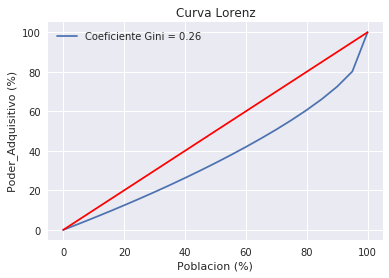

In [75]:
#Representamos la curva de Lorenz
coeficiente_gini = gini(df_grupo1['Poder_Adquisitivo'].values)
porcentaje_poblacion, porcentaje_poder_adquisitivo = curva_lorenz(df_grupo1, 'Poder_Adquisitivo')
plt.plot(porcentaje_poblacion*100, porcentaje_poder_adquisitivo, label = 'Coeficiente Gini = %.2f'%coeficiente_gini)
plt.plot(range(101), color = 'red')
plt.xlabel('Poblacion (%)')
plt.ylabel('Poder_Adquisitivo (%)')
plt.title('Curva Lorenz')
plt.legend()
plt.show()

Podemos ver como el índice de Gini ha descendido respecto al conjunto de datos original, pero sigue teniendo un índice superior para que en el caso de clase baja. Además podemos ver a simple vista que el área bajo la curva es superior que para el caso de la clase baja. Para ver de forma más clara  vamos a proceder a representar nuestro variable de poder adquistivo para este grupo en un scatter plot.

In [76]:
output_notebook()
p = figure(x_axis_label = 'indice', y_axis_label = 'poder adquisitivo',
           plot_width=800, plot_height=800)
#Añadimos circulo a nuestra figura
p.circle( x = list(df_grupo1.index), y = df_grupo1['Poder_Adquisitivo'].values)
#Nos creamos nuestro archivo html de salida
#output_file('fert_lit.html')
#Mostramos los resultados
show(p)

Loading BokehJS ...

Esta gráfico nos muestra un poco mejor que es lo que está realmente con la clase alta, podemos ver como tenemos un gran conjunto de personas que se distribuye entre los 22000€ y los 35000€ donde parece ser que la varianza no es muy elevada, a partir de aquí podemos ver que la varianza entre salarias es bastante desigual, es decir, las diferencias entre la gente que gana dinero es bastante elevada.

Al principio tras ver una distribución bimodal pensamos que se trataba de un conjunto de datos en el cual podríamos tener información de grupos de personas de distinta zona geográfica (distinto IPC), pero al confirmarnos el equipo de cajamar que el poder adquisitivo se consideraba como el salario bruto sin tener en cuenta el IPC, descartamos esa opción. Tras hablar con gente experta, hemos llegado a la conclusión de que estamos tratando con datos de una población amplia, probablemente de todo el territorio español, donde estamos viendo dos tipos de poblaciones: gente con reducido poder adquisitivo y gente con alto poder adquisitivo, dentro de este segundo grupo podemos ver que existen amplias diferencias.

### Buscando relación entre adquisición de productos por clase social

Una vez hemos realizado un análisis profundo de la variable a predecir, vamos a proceder a responder a la siguiente pregunta: ¿Existe alguna relación entre el tipo de producto contratado y el poder adquisitivo?. Para responder a esta pregunta hemos optado por crearnos 4 variables nuevas:

1. Tipo_0: Esta variable lo que nos indica es el número total de productos que una persona no tiene contratados

2. Tipo_1: Esta variable lo que nos indica es el número total de productos que una persona tiene contratados

3. Tipo_2: Esta variable nos indica el número total de productos que una persona ha tenido contratado en los últimos 3 meses.

4. Total_Productos: Nos indica el total de productos que tiene contratada una persona, simplemente será la suma de los productos Tipo_1 y Tipo_2.

In [27]:
df[['Tipo_0', 'Tipo_1', 'Tipo_2']] = df.loc[:, 'Ind_Prod_01':'Ind_Prod_24'].apply(pd.value_counts, axis = 1).fillna(0)

In [28]:
df['Total_Productos'] = df['Tipo_1'] + df['Tipo_2']

Ahora para buscar si existe alguna relacción entre la adquisición de un producto y el poder adquisitivo, hemos realizado un gráfico para cada producto y por clase social, de forma que para cada producto tendremos un conteo de las personas que tienen ese producto, por clase social.

In [29]:
#Hacemos el gráfico para lo que hemos considerado como clase baja
lista_productos = ['Ind_Prod_01','Ind_Prod_02', 'Ind_Prod_03', 'Ind_Prod_04', 'Ind_Prod_05', 'Ind_Prod_06', 'Ind_Prod_07', 'Ind_Prod_08',
                   'Ind_Prod_09', 'Ind_Prod_10', 'Ind_Prod_11', 'Ind_Prod_12', 'Ind_Prod_13', 'Ind_Prod_14', 'Ind_Prod_15', 'Ind_Prod_16',
                   'Ind_Prod_17', 'Ind_Prod_18','Ind_Prod_19', 'Ind_Prod_20', 'Ind_Prod_21', 'Ind_Prod_22', 'Ind_Prod_23', 'Ind_Prod_24']
df_grupo0 = df[df['Clase_Social'] == 0] 
lista_paneles_g1 = []
for producto in lista_productos:
    aux = df_grupo0[producto].value_counts()
    lista_valores = [valor for valor in aux.values]
    lista_tipo = [tipo for tipo in aux.index]
    source = ColumnDataSource(data=dict(tipo = lista_tipo, counts=lista_valores))
    p = figure(x_range=lista_tipo, plot_height=250, toolbar_location=None)
    p.vbar(x='tipo', top='counts', width=0.9, source=source, line_color='white', fill_color=factor_cmap('tipo', palette=Spectral6, factors=lista_tipo))
    p.xgrid.grid_line_color = None
    p.y_range.start = 0
    tab = Panel(child = p, title = producto)
    lista_paneles_g1.append(tab)
    
layout_g1 = Tabs(tabs = lista_paneles_g1)
show(layout_g1)

In [30]:
#Hacemos el gráfico para lo que hemos considerado como clase alta
output_notebook()
lista_productos = ['Ind_Prod_01','Ind_Prod_02', 'Ind_Prod_03', 'Ind_Prod_04', 'Ind_Prod_05', 'Ind_Prod_06', 'Ind_Prod_07', 'Ind_Prod_08',
                   'Ind_Prod_09', 'Ind_Prod_10', 'Ind_Prod_11', 'Ind_Prod_12', 'Ind_Prod_13', 'Ind_Prod_14', 'Ind_Prod_15', 'Ind_Prod_16',
                   'Ind_Prod_17', 'Ind_Prod_18','Ind_Prod_19', 'Ind_Prod_20', 'Ind_Prod_21', 'Ind_Prod_22', 'Ind_Prod_23', 'Ind_Prod_24']
df_grupo1 = df[df['Clase_Social'] == 1] 
lista_paneles_g1 = []
for producto in lista_productos:
    aux = df_grupo1[producto].value_counts()
    lista_valores = [valor for valor in aux.values]
    lista_tipo = [tipo for tipo in aux.index]
    source = ColumnDataSource(data=dict(tipo = lista_tipo, counts=lista_valores))
    p = figure(x_range=lista_tipo, plot_height=250, toolbar_location=None)
    p.vbar(x='tipo', top='counts', width=0.9, source=source, line_color='white', fill_color=factor_cmap('tipo', palette=Spectral6, factors=lista_tipo))
    p.xgrid.grid_line_color = None
    p.y_range.start = 0
    tab = Panel(child = p, title = producto)
    lista_paneles_g1.append(tab)
    
layout_g2 = Tabs(tabs = lista_paneles_g1)
show(layout_g2)

Loading BokehJS ...

De las siguientes gráficas podemos sacar la siguiente conclusión: La tenencia o no de un producto no está relacionado con el poder adquisitivo, es decir, los productos son contratados en igual proporción por ambas clases sociales. Si nos movemos por los productos de ambas clases sociales podemos ver como la proporción no varía pese a la desigualdad existente en el poder adquisitivo.

La siguiente pregunta que nos hacemos es ¿Existe relación entre el poder adquisitivo y el número total de productos
contratados por las personas?. Para responder esta pregunta hemos optado por realizar un diagrama de cajas, con el objetivo de ver esto de forma más clara.

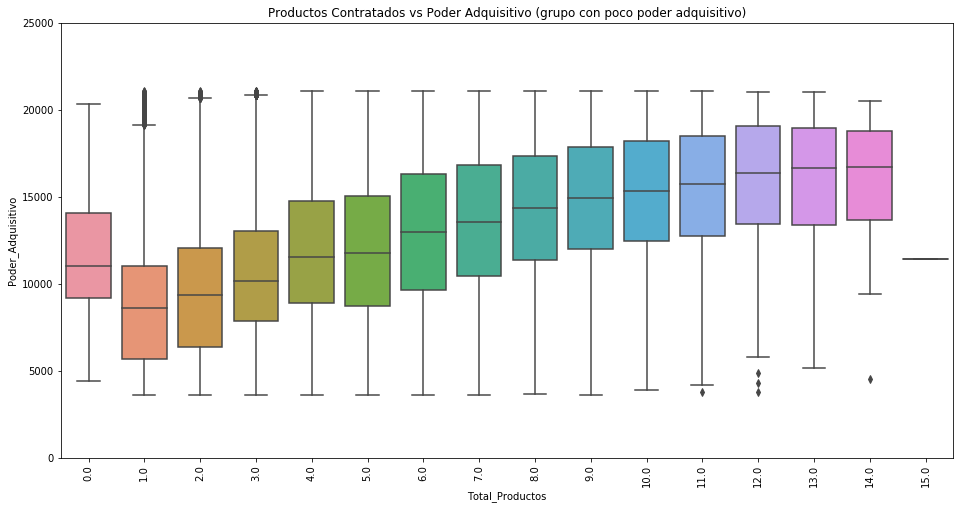

In [31]:
#Box plots para la clase baja
var = 'Total_Productos'
df_grupo0 = df[df['Clase_Social'] == 0]
data = pd.concat([df_grupo0['Poder_Adquisitivo'], df_grupo0[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="Poder_Adquisitivo", data=data)
fig.axis(ymin=0, ymax=25000.0)
plt.xticks(rotation=90)
plt.title('Productos Contratados vs Poder Adquisitivo (grupo con poco poder adquisitivo)')
plt.show()

Aquí podemos ver que si que existe una clara relación entre el poder adquisitivo y el número de productos contratados por las personas si que cambia, en este boxplot podemos observar lo siguiente:

1. Tenemos personas que no tienen ningún tipo de producto pero que tienen un poder adquisitivo superior al de personas que tienen 1,2,3 productos.

2. A medida que aumenta el número de productos contratados tiende a aumentar el poder adquisitivo de las personas, además la mediana se mantiene constante, y para esta conjunto de personas parece ser que existe una simetría entre los datos, ya que la mediana se encuentra aproximadamente en el centro de la caja. 

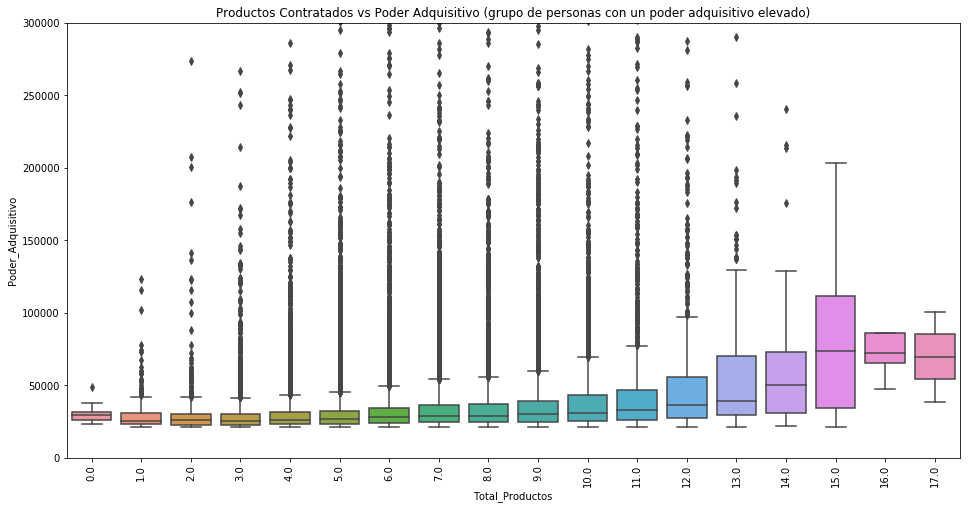

In [32]:
#Box plots para la clase alta
var = 'Total_Productos'
df_grupo1 = df[df['Clase_Social'] == 1]
data = pd.concat([df_grupo1['Poder_Adquisitivo'], df_grupo1[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="Poder_Adquisitivo", data=data)
fig.axis(ymin=0, ymax=300000.0)
plt.xticks(rotation=90)
plt.title('Productos Contratados vs Poder Adquisitivo (grupo de personas con un poder adquisitivo elevado)')
plt.show()

En esta gráfica hemos limitado el eje y a 300000€ con el objetivo de poder observar que está ocurriendo con este grupo de personas, ya que si representamos el eje completo al tener gente con un elevado poder adquisitivo no se podían visualizar bien los resultados.Si nos centramos en la caja que representa el 50% de los datos, podemos ver claramente que las personas con 15 productos son las personas con mayor poder adquisitivo, conforme la gente tiene una mayor cantidad de productos podemos ver que el poder adquisitivo. La mediana se mantiene más o menos constante, y podemos ver además que existe una mayor varianza entre las personas que se agrupan entre el segundo y el tercer cuartil, esta situación se mantiene hasta que las personas tiene un un total de 13 productos. Las personas que tienen un total de 14 productos, la mediana pasa a aumentar y este conjunto de personas tiene pinta de ser simétrica, lo mismo ocurrer para el caso de las personas que tienen un total de 15 productos.

Ahora calculemos la correlación existente entre la variable número total de productos con cada una de las clases sociales

In [77]:
print('Correlación entre Total_Productos vs Poder_Adquisitivo para el grupo de personas con poco poder adquisitivo\n')
print(df_grupo0[['Total_Productos', 'Poder_Adquisitivo']].corr())
print('\n')
print('Correlación entre Total_Productos vs Poder_Adquisitivo para el grupo de personas con elevado poder adquisitivo\n')
print(df_grupo1[['Total_Productos', 'Poder_Adquisitivo']].corr())

Correlación entre Total_Productos vs Poder_Adquisitivo para el grupo de personas con poco poder adquisitivo

                   Total_Productos  Poder_Adquisitivo
Total_Productos           1.000000           0.326887
Poder_Adquisitivo         0.326887           1.000000


Correlación entre Total_Productos vs Poder_Adquisitivo para el grupo de personas con elevado poder adquisitivo

                   Total_Productos  Poder_Adquisitivo
Total_Productos            1.00000            0.10104
Poder_Adquisitivo          0.10104            1.00000


Pese a tener una correlación baja entre número total de productos y el poder adquisivo, podemos ver que se trata de una variable que esta mucho más correlada con las personas que tiene un poder adquisitivo bajo, lo que hace a priori indicar que la cantidad de productos contratados parece marcar más el poder adquisitivo entre las personas que tienen un bajo poder adquisitivo.

### Analizando las variables Num_Oper_01 - Num_Oper_20 

A continuación vamos a proceder a ver la correlación entre las operaciones realizadas por las personas y su poder adquisitivo.

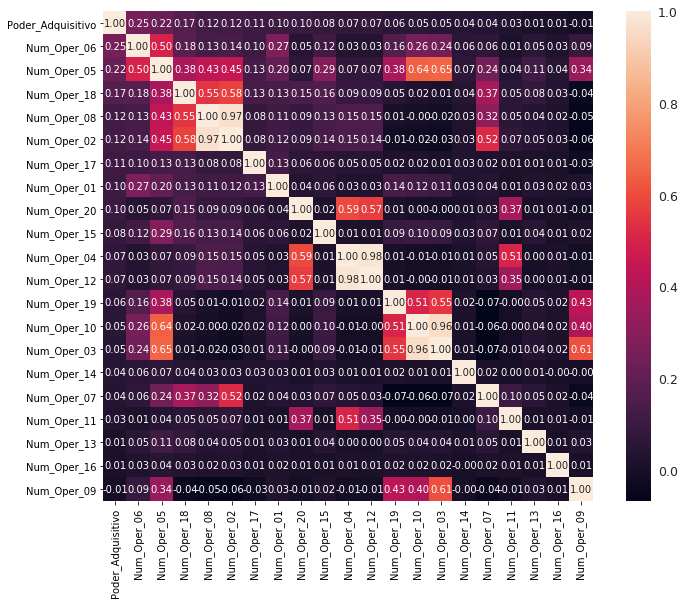

In [33]:
#Calculamos y mostramos la matriz de correlación entre el número de operaciones y el poder adquisitivo
df_num_oper = df.loc[:, 'Num_Oper_01':'Num_Oper_20']
df_poder_adquisitivo =df.loc[:, 'Poder_Adquisitivo']
corrmat = pd.concat([df_num_oper, df_poder_adquisitivo], axis = 1).corr()
k = 21
cols = corrmat.nlargest(k, 'Poder_Adquisitivo')['Poder_Adquisitivo'].index
cm = np.corrcoef(df[cols].values.T)
f, ax = plt.subplots(figsize=(12, 9))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

De esta gráfica podemos sacar las siguientes conclusiones:

1. Parece ser que la salida no está muy correlacionada con el número de operaciones

2. Num_Oper_10 y Num_Oper_03 tienen una correlación elevada de 0.96

3. Num_Oper_04 y Num_Oper_12 tienen una correlación muy elevada 0.98

4. Num_Oper_08 y Num_Oper_02 tienen una correlación muy elevada 0.97

Que nos indica esta correlación casi perfecta, nos indica que cuando Num_Oper_10 aumenta entonces Num_Oper_03 también aumenta y en proporción constante, esto nos podría indicar que estas dos operaciones se refieren al mismo producto financiero.Esto se cumple para Num_Oper_04 y Num_Oper_12, y para Num_Oper_08 y Num_Oper_02. En otras, palabras si en Num_Oper_10 se producen 5 operaciones en Num_Oper_03 también se producen 5 operaciones. Veamos que comportamiento estadístico tienen cada una de estas variables.

In [78]:
print(df[['Num_Oper_03', 'Num_Oper_10']].describe())
print('\n')
print(df[['Num_Oper_04', 'Num_Oper_12']].describe())
print('\n')
print(df[['Num_Oper_08', 'Num_Oper_02']].describe())

         Num_Oper_03    Num_Oper_10
count  363834.000000  363834.000000
mean        5.320195       3.812500
std         8.995213       7.334178
min         0.000000       0.000000
25%         0.000000       0.000000
50%         0.000000       0.000000
75%         8.000000       5.000000
max       239.000000     236.000000


         Num_Oper_04    Num_Oper_12
count  363834.000000  363834.000000
mean        0.024687       0.021433
std         0.664091       0.601521
min         0.000000       0.000000
25%         0.000000       0.000000
50%         0.000000       0.000000
75%         0.000000       0.000000
max        59.000000      57.000000


         Num_Oper_08    Num_Oper_02
count  363834.000000  363834.000000
mean        1.126857       1.416915
std         4.150717       4.789291
min         0.000000       0.000000
25%         0.000000       0.000000
50%         0.000000       0.000000
75%         0.000000       0.000000
max       330.000000     332.000000


Podemos observar que para todas estas operaciones predomina el valor de cero operaciones, es decir, estas operaciones están relacionadas con productos financieros en los que apenas se opera. Podemos ver que pese a que en la gran mayoría  es cero, podemos ver que tenemos en ocasiones que el número de operaciones es elevado, esto nos indica que el intervalo temporal de estas operaciones no es diario, deben tratarse de operaciones que se realizan mensualmente o incluso en un periodo de tiempo superior.

Analicemos ahora todas y cada una de las variables Num_Oper de nuestro conjunto de datos desde un punto de vista estadístico.

In [79]:
print(df.loc[:, 'Num_Oper_01':'Num_Oper_20'].describe(percentiles = [.25,.5,.75,.95]))

         Num_Oper_01    Num_Oper_02    Num_Oper_03    Num_Oper_04  \
count  363834.000000  363834.000000  363834.000000  363834.000000   
mean        0.893902       1.416915       5.320195       0.024687   
std         4.231527       4.789291       8.995213       0.664091   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       8.000000       0.000000   
95%         4.000000      10.000000      24.000000       0.000000   
max       464.000000     332.000000     239.000000      59.000000   

         Num_Oper_05    Num_Oper_06    Num_Oper_07    Num_Oper_08  \
count  363834.000000  363834.000000  363834.000000  363834.000000   
mean       14.790492       2.554687       0.361536       1.126857   
std        14.357671       2.712385       1.720875       4.150717   
min         0.000000       0.0000

Análisis:

1. Podemos ver que tenemos un gran grupo de operaciones que está asociado con productos financieros en los que el 95% de la población no realiza ningún tipo de operación sobre el producto financiero asociado (Num_Oper_04, Num_Oper_11, Num_Oper_12, Num_Oper_14, Num_Oper_16,Num_Oper_20). Dentro de este grupo podemos ver que existen personas que realizan un alto número de operaciones, excepto en el caso de Num_Oper_20 donde no existen personas que se alejen en exceso del promedio.

2. Tenemos otro grupo que corresponden a Operaciones asociadas a productos financieros sobre los que no se realiza ninguna operación, pero se realizan en mayor medida que en las operaciones descritas en el primer punto, estas son: Num_Oper_01, Num_Oper_02, Num_Oper_07, Num_Oper_08, Num_Oper_13, Num_Oper_18. Para este grupo el 75% de la población no realiza operaciones sobre este tipo de productos financieros. En este grupo de productos la desviación no es muy elevevada, una vez más observamos para estos productos personas que realizan un elevado número de operaciones.

3. Después tenemos un grupo de operaciones relacionados con productos financieros donde el 50% de la gente realiza operaciones y el otro 50% no las realiza:Num_Oper_03, Num_Oper_09, Num_Oper_10. En este grupo el número de operaciones media realizadas es similar.

4. El grupo de Num_Oper_05, Num_Oper_06 y Num_Oper_17 se tratan de operaciones relacionados con productos financieros donde se la gran mayoría de la población realiza operaciones,  tenemos como en los otros casos personas que realizan un elevado número de operaciones.  Especial mención recibe Num_Oper_05 en el cual podemos observar un máximo de 1313 operaciones.

### Analizando  las variables Imp_Cons_01-Imp_Cons_17

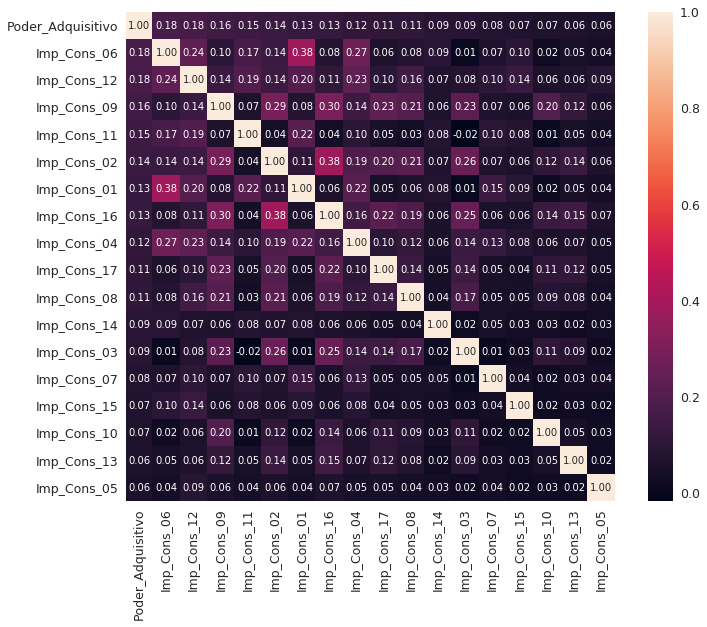

In [37]:
df_imp_cons = df.loc[:, 'Imp_Cons_01':'Imp_Cons_17']
df_poder_adquisitivo =df.loc[:, 'Poder_Adquisitivo']
corrmat = pd.concat([df_imp_cons, df_poder_adquisitivo], axis = 1).corr()
k = 18
cols = corrmat.nlargest(k, 'Poder_Adquisitivo')['Poder_Adquisitivo'].index
cm = np.corrcoef(df[cols].values.T)
f, ax = plt.subplots(figsize=(12, 9))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Parece ser que no existe correlación entre estas variables.Esta información hace referencia al importe de consumos habituales del cliente en base a sus operaciones con tarjetas y domiciliaciones más comunes. Por lo tan cabría pensar en que personas con un poder adquisitivo parecido deberían tener en general unos gastos parecidos en en estas variables.

/home/david/tensorflow/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


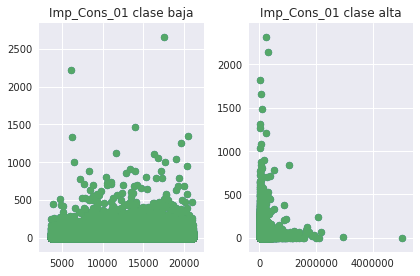

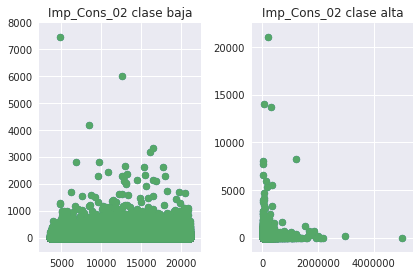

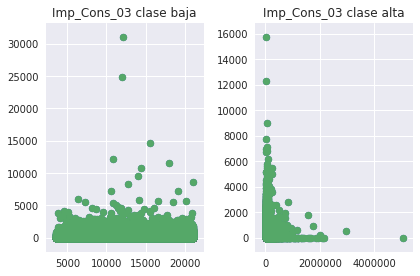

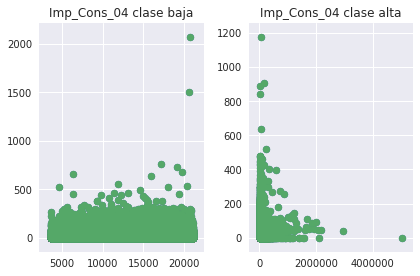

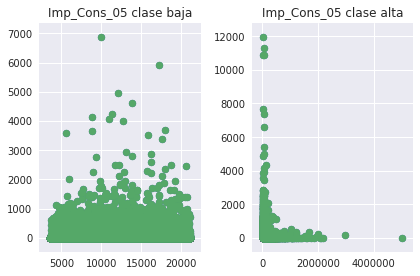

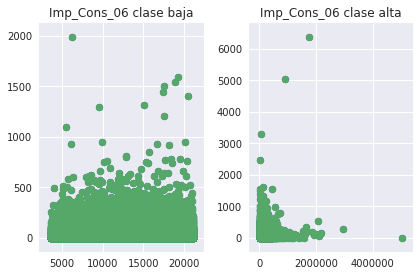

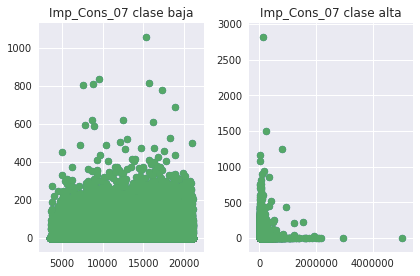

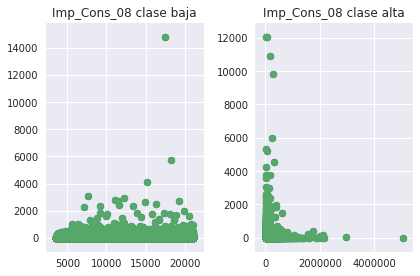

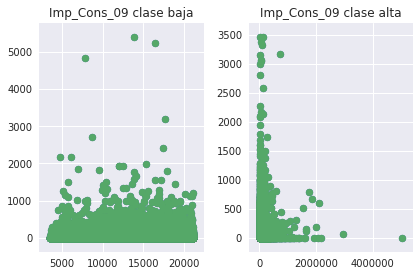

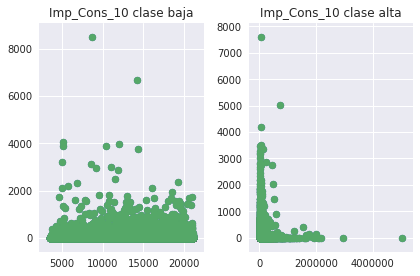

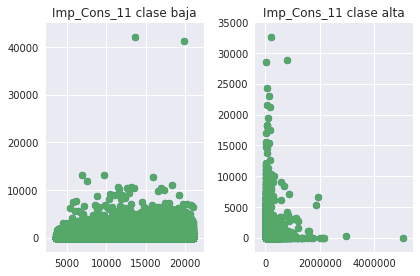

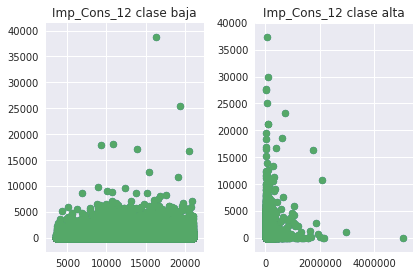

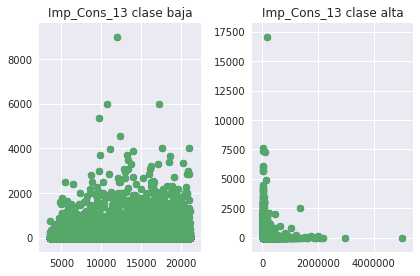

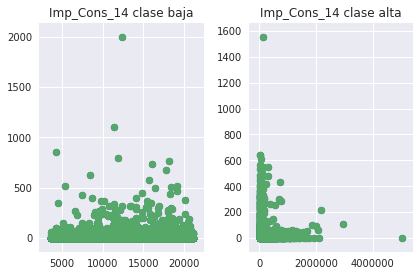

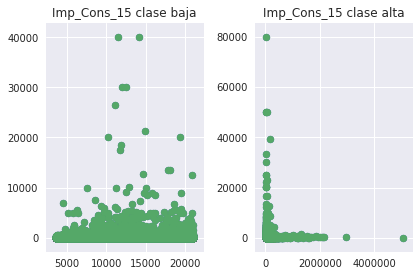

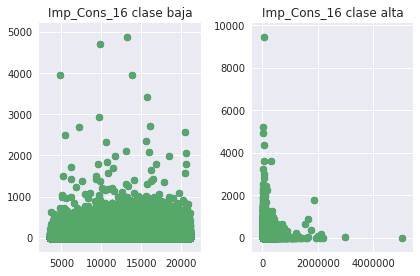

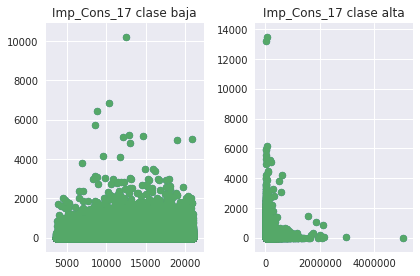

In [80]:
df_imp_cons0 = df_grupo0.loc[:, 'Imp_Cons_01':'Imp_Cons_17']
df_poder_adquisitivo0 =  df_grupo0.loc[:, 'Poder_Adquisitivo']
df_imp_cons1 = df_grupo1.loc[:, 'Imp_Cons_01':'Imp_Cons_17']
df_poder_adquisitivo1 =  df_grupo1.loc[:, 'Poder_Adquisitivo']
df_final0 = pd.concat([df_imp_cons0, df_poder_adquisitivo0], axis = 1)
df_final1 = pd.concat([df_imp_cons1, df_poder_adquisitivo1], axis = 1)

for col in df_imp_cons0.columns: 
    for i in np.arange(2)+1:
        plt.subplot(1,2,1)
        #print(df_grupo0[col].describe(percentiles = [.25, .5, .75, .95]))
        #print(df_grupo0[df_grupo0[col] == 0].shape[0])
        plt.scatter(y = col, x = 'Poder_Adquisitivo', data = df_final0)
        plt.title(col + ' clase baja')
        #print(df_grupo1[col].describe(percentiles = [.25, .5, .75, .95]))
        #print(df_grupo1[df_grupo1[col] == 0].shape[0])
        plt.subplot(1,2,2)
        plt.scatter(y = col, x = 'Poder_Adquisitivo', data = df_final1)
        plt.title(col + ' clase alta')
    plt.tight_layout()
    plt.show()


De estas gráficas podemos sacar las siguientes conclusiones:
    1. Las variables Imp_Cons_{01,03,04,08,09,11,14} presentan picos de consumición más altos para el grupo de personas que tienen un bajo poder adquisitivo. 
    2. Las variables Imp_Cons_10 e Imp_Cons_12 tienen picos de consumo exactamente iguales para ambos grupos de personas.
    3. Las variables Imp_Cons_{05,06,07,13,15,16,17} tienen picos de consumición superiores para el grupo de personas que tienen un elevado poder adquisitivo.
    4. Mientras que para la clase baja cuanto mayor es el poder adquisitivo entre este grupo mayor es el importe en estas variables, para la clase alta pasa todo lo contrario, cuanto mayor es el poder adquisitivo menor es el importe en estas variables. Es más parece ser que el importe asociado a estas variables decrece de forma exponencial.

Debido a la falta de información del dominio y de la descripción de las variables no podemos obtener más conclusiones.

### Analizando las variables Imp_Sal_01- Imp_Sal_21 

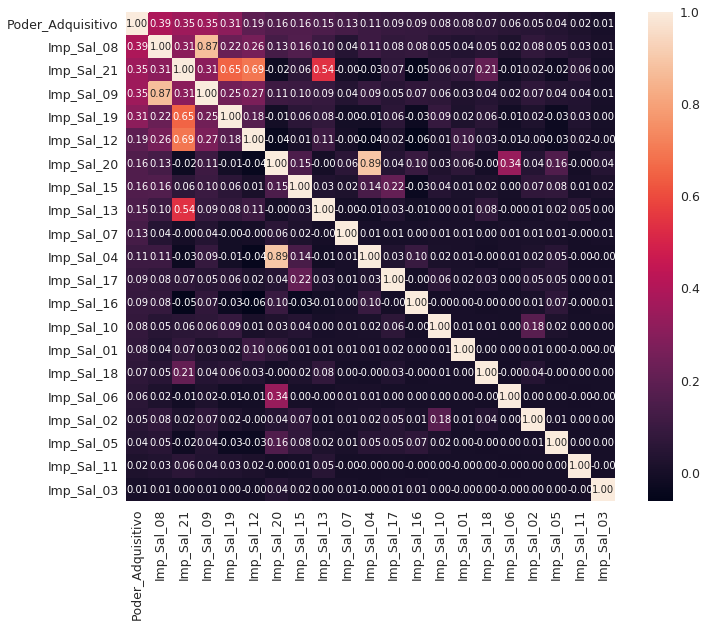

In [38]:
df_imp_sal = df.loc[:, 'Imp_Sal_01':'Imp_Sal_21']
df_poder_adquisitivo =df.loc[:, 'Poder_Adquisitivo']
corrmat = pd.concat([df_imp_sal, df_poder_adquisitivo], axis = 1).corr()
k = 22
cols = corrmat.nlargest(k, 'Poder_Adquisitivo')['Poder_Adquisitivo'].index
cm = np.corrcoef(df[cols].values.T)
f, ax = plt.subplots(figsize=(12, 9))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Podemos ver que existe una correlación elevado entre las variables:

1. Imp_Sal_09, Imp_Sal_08 (0.87)

2. Imp_Sal_20, Imp_Sal_04 (0.89)

La implicación que tiene que estas variables estén correlacionadas es que cuando se produce un movimiento en Imp_Sal_09, Imp_Sal_08 se ve afectada en la misma proporción aproximadamente, igual ocurre para Imp_Sal_20 y para Imp_Sal_04, poco más podemos decir ya que no tenemos la descripción completa de cada una de estas variables. Al igual que para el caso de las Variables Imp_Cons enfrentemos las dos clases sociales

/home/david/tensorflow/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


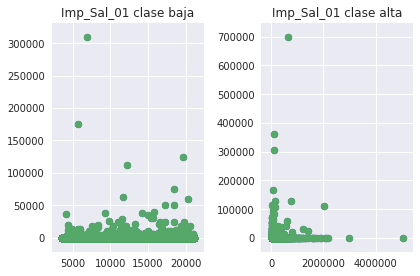

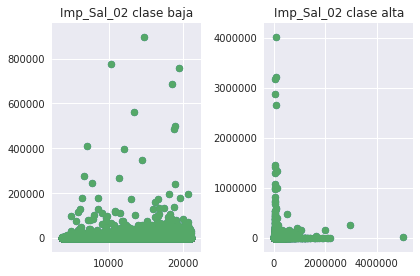

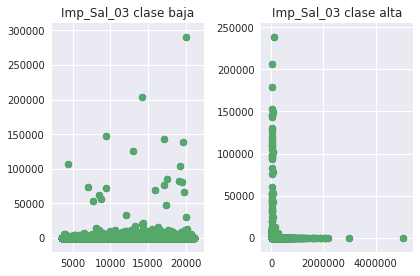

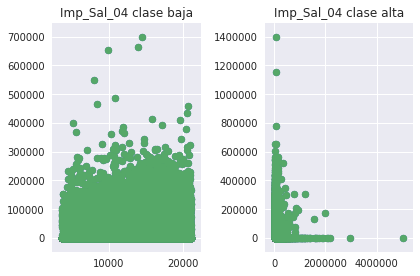

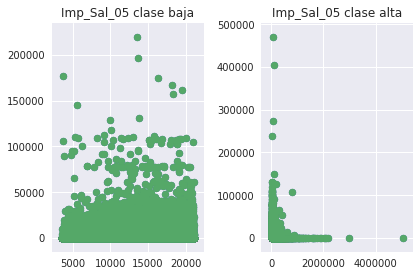

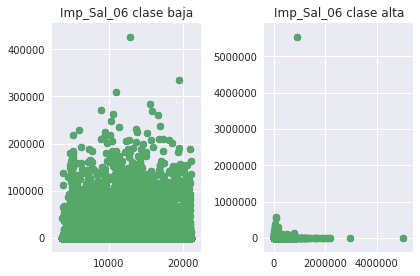

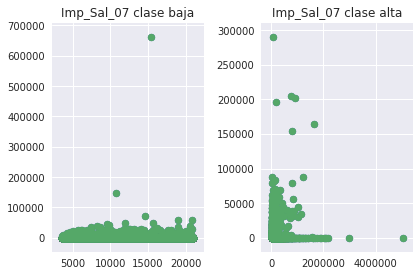

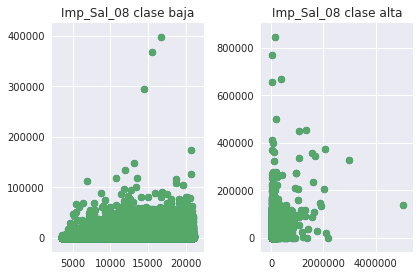

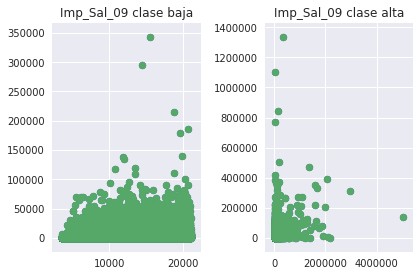

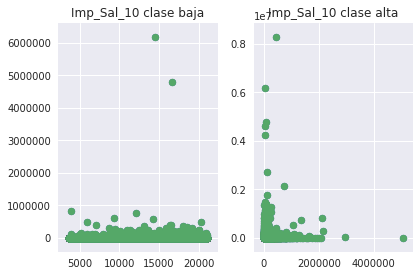

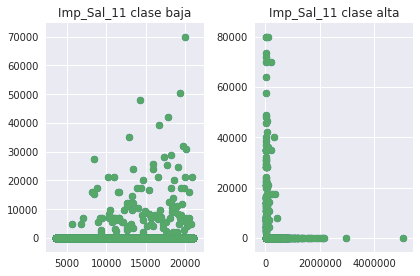

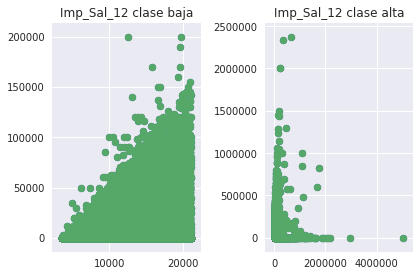

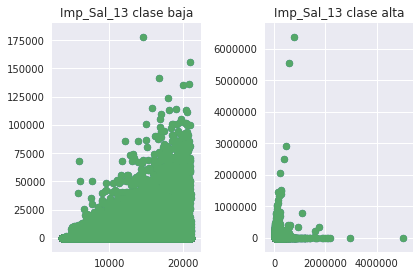

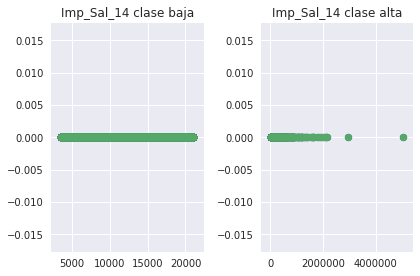

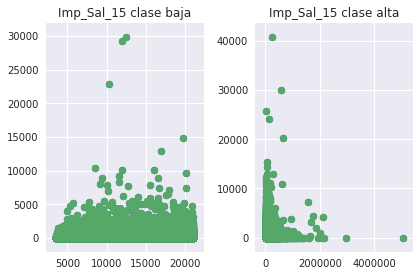

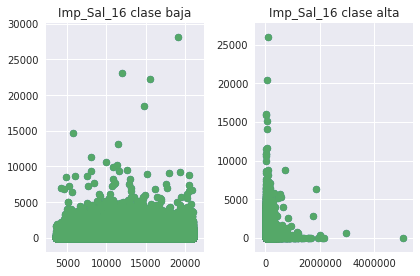

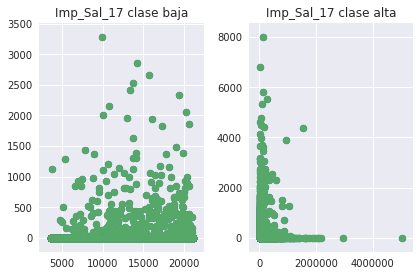

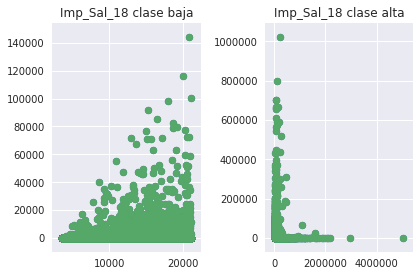

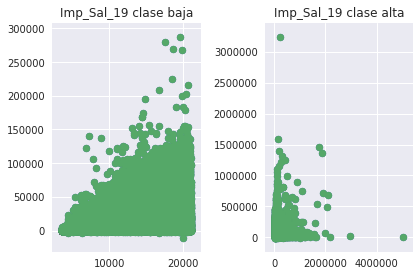

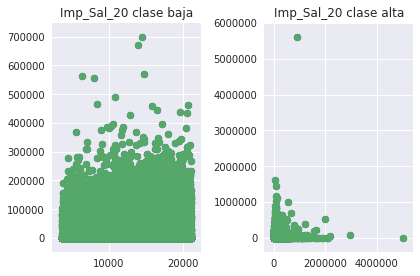

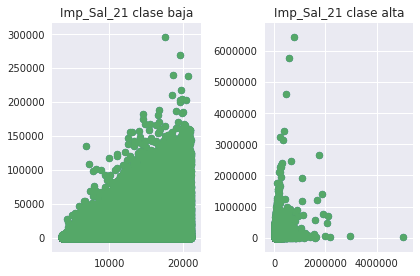

In [81]:
#Enfrentamos las dos clases sociales
df_imp_cons0 = df_grupo0.loc[:, 'Imp_Sal_01':'Imp_Sal_21']
df_poder_adquisitivo0 =  df_grupo0.loc[:, 'Poder_Adquisitivo']
df_imp_cons1 = df_grupo1.loc[:, 'Imp_Sal_01':'Imp_Sal_21']
df_poder_adquisitivo1 =  df_grupo1.loc[:, 'Poder_Adquisitivo']
df_final0 = pd.concat([df_imp_cons0, df_poder_adquisitivo0], axis = 1)
df_final1 = pd.concat([df_imp_cons1, df_poder_adquisitivo1], axis = 1)

for col in df_imp_cons0.columns: 
    for i in np.arange(2)+1:
        plt.subplot(1,2,1)
        #print(df_grupo0[col].describe(percentiles = [.25, .5, .75, .95]))
        #print(df_grupo0[df_grupo0[col] == 0].shape[0])
        plt.scatter(y = col, x = 'Poder_Adquisitivo', data = df_final0)
        plt.title(col + ' clase baja')
        #print(df_grupo1[col].describe(percentiles = [.25, .5, .75, .95]))
        #print(df_grupo1[df_grupo1[col] == 0].shape[0])
        plt.subplot(1,2,2)
        plt.scatter(y = col, x = 'Poder_Adquisitivo', data = df_final1)
        plt.title(col + ' clase alta')
    plt.tight_layout()
    plt.show()

Podemos ver que en este caso para la mayoría se cumple que los picos de consumo son mayores para el caso de la gente que tiene un alto poder adquisitivo. Sin embargo podemos ver que la gente que tiene un poder adquisitivo pequeño dispone de Importes elevados llegando a picos de 6 millones de euros como se puede observar en la variable 10. Podemos ver también que para el caso de gente con alto poder adquisitivo como a medida que aumenta el poder adquistivo sus importes en este tipo de productos se ve bastante reducido. Una vez más la falta de información respecto a las variables nos impide indicar poco más. 

### Buscando correlación entre las variables Num_Oper y Imp_Sal

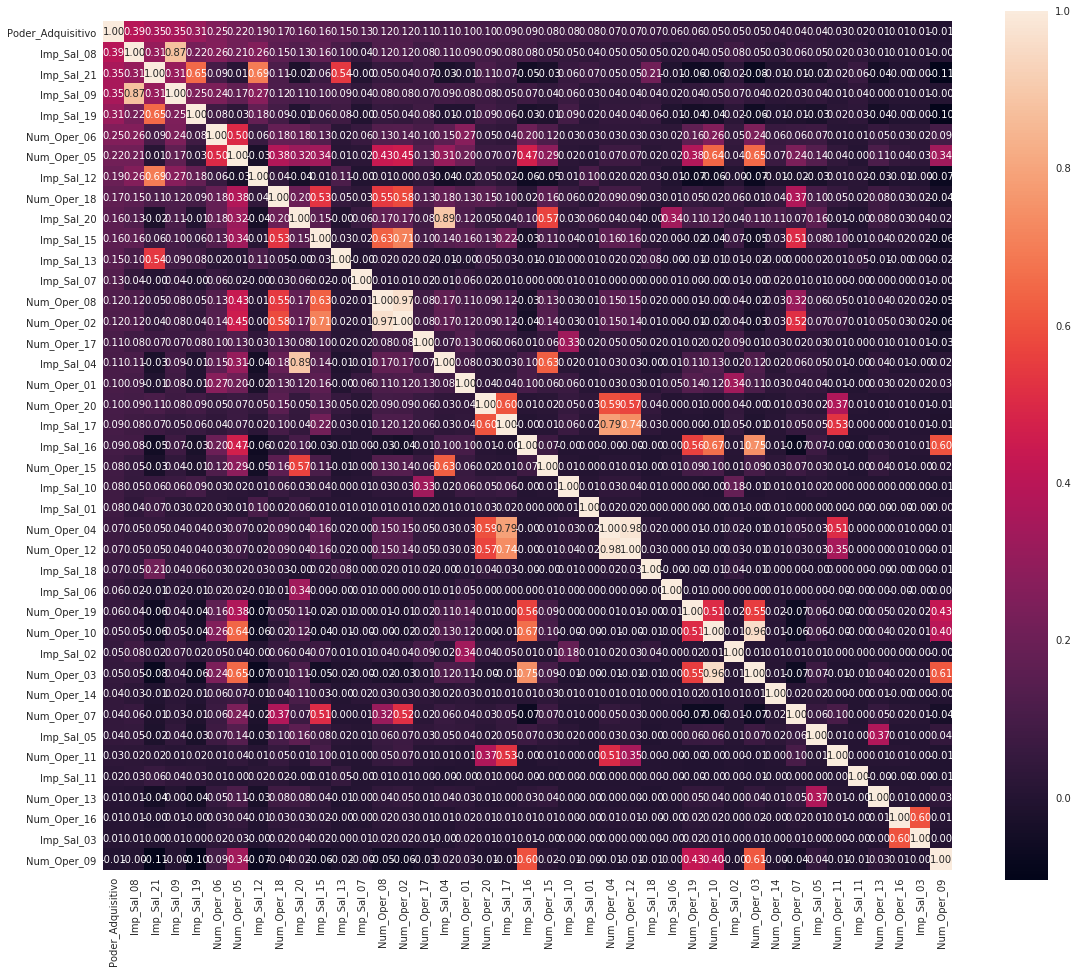

In [41]:
df_num_oper = df.loc[:, 'Num_Oper_01':'Num_Oper_20']
df_imp_sal = df.loc[:, 'Imp_Sal_01':'Imp_Sal_21']
df_poder_adquisitivo =df.loc[:, 'Poder_Adquisitivo']
corrmat = pd.concat([df_num_oper, df_imp_sal, df_poder_adquisitivo], axis = 1).corr()
k = 42
cols = corrmat.nlargest(k, 'Poder_Adquisitivo')['Poder_Adquisitivo'].index
cm = np.corrcoef(df[cols].values.T)
f, ax = plt.subplots(figsize=(19, 16))
sns.set(font_scale=1.0)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Esta gráfica nos arroja una serie de resultados:

1. Imp_Sal_17 tiene una correlación elevada entre con Num_Oper_04 y Num_Oper_12, a su vez num Oper_04 y Num_Oper_12 están altamente correladas, 0.98.

2. Otra de las cosas que podemos ver es que muchas variables Imp_Sal tiene una correlación prácticamente cero con todas las variables Num_Oper menos con una de ellas, esto se puede apreciar para por ejemplo Imp_Sal_03, que tiene una correlació de 0.6 con Num_Oper_16 mientras que para el resto es nula.

3. Finalmente podemos observar variables de tipo Imp_Sal que son prácticamente nula su correlación con el resto de variables, esto lo que nos dice es que su correlación no es lineal, pero no significa que no este correlada con ninguna variable.

### Analizando variables Sociodemográficas

A continuación vamos a proceder a realizar un análisis de las variables sociodemográficas. Tenemos un total de 5 variables sociodemográficas, de las cuales 3 son numéricas y 2 son de tipo categórico.

En primer hemos procedido a calcular la matriz de correlación entre las distintas variables sociodemagráficas de tipo numérico.

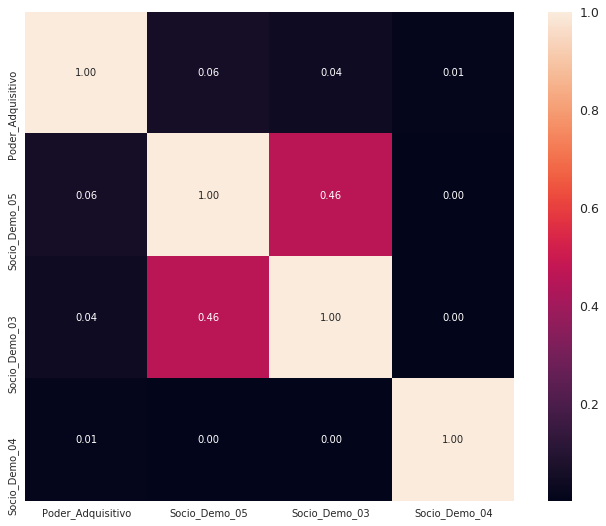

In [82]:
df_num_sociodemo = df.loc[:, 'Socio_Demo_03':'Socio_Demo_05']
df_poder_adquisitivo =df.loc[:, 'Poder_Adquisitivo']
corrmat = pd.concat([df_num_sociodemo, df_poder_adquisitivo], axis = 1).corr()
k = 21
cols = corrmat.nlargest(k, 'Poder_Adquisitivo')['Poder_Adquisitivo'].index
cm = np.corrcoef(df[cols].values.T)
f, ax = plt.subplots(figsize=(12, 9))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Estos resultados arrojan que la correlación con la salida de nuestras variables sociodemográficas es nula. Por otro lado también nos muestra que las variables socio_demo_03 y socio_demo_05 arrojan una correlación debil.

A continuación procedemos a hacer un describe de estas variables

In [83]:
df.loc[:, 'Socio_Demo_03':'Socio_Demo_05'].describe(percentiles = [.25,.5,.75,.95])

,Socio_Demo_03,Socio_Demo_04,Socio_Demo_05
count,363834.000000,363834.000000,363834.000000
mean,53.828426,8.209216,18.560715
std,19.424026,206.360180,12.404950
min,0.350000,1.000000,0.000000
25%,38.340000,1.000000,10.000000
50%,51.849998,2.000000,17.000000
75%,69.739998,3.000000,25.000000
95%,86.040001,4.000000,41.000000
max,117.580002,7097.000000,58.000000


Poco más podemos decir respecto a estas variables, ya que la falta de información no nos permite interpretar la información que nos aporta cada una de ellas.

Respecto a las variables sociodemográficas categóricas, ya indicamos que la variable Socio_Demo_01 se trata de una variable con un total de 508 categorías diferentes donde para más u 40% del dataset aproximadamente toma el valor de 09991, además contiene valores perdidos. La variable Socio_Demo_02 se trata de una variable con un total de dos valores 1 y 2, para un 61% de nuestro conjunto de datos toma el valor de la etiqueta 1. Una vez más debido a la falta de información no se nos permite interpretar las variables de forma adecuada. Se penso que la varible Socio_Demo_01 se podría tratar de codigos postales, pero dicha variable contiene etiquetas que no pertenecen a ningún código postal, además de que aparece la etiqueta 0x301, lo que nos hizo rehusar de esta idea inicial.

In [84]:
df.loc[:, 'Socio_Demo_01':'Socio_Demo_02'].describe()

,Socio_Demo_01,Socio_Demo_02
count,363224,363834
unique,508,2
top,09991,1
freq,105895,222254


# Preprocesamiento de variables

En primer lugar analizamos la variable a predecir, Poder_Adquisitivo.

In [48]:
df_m = df_ini.copy()

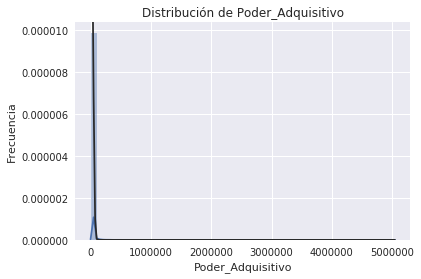

In [49]:
sns.distplot(df_m['Poder_Adquisitivo'] , fit=norm);

plt.ylabel('Frecuencia')
plt.title('Distribución de Poder_Adquisitivo')

plt.show()

La cola más larga de la distribución se encuentra desviada hacia la derecha de ésta, por lo que la distribución es sesgada a la derecha.
Como los modelos (lineales) necesitan que los datos esten distribuidos normalmente, necesitamos transformar esta variable y hacer que se distribuya más normalmente. Además de discretizar los valores por centenas para tener una mejor distribución (por ejemplo, los valores 3603.40 y 3610.8 pasarían a ser 3600).

Aplicamos una transformación logarítmica 1+x para que no haya conflicto con los registros en las variables igual a 0.


 mu = 9.50 and sigma = 0.58



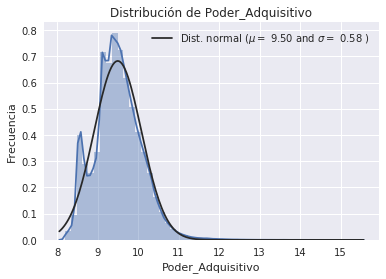

In [50]:
df_m["Poder_Adquisitivo"] = np.round(df_m["Poder_Adquisitivo"].values)

def roundup(x):
    return (np.round(x/100.0))*100

df_m["Poder_Adquisitivo"] = roundup(df_m["Poder_Adquisitivo"].values)
df_m["Poder_Adquisitivo"] = np.log1p(df_m["Poder_Adquisitivo"])

sns.distplot(df_m['Poder_Adquisitivo'] , fit=norm);

(mu, sigma) = norm.fit(df_m['Poder_Adquisitivo'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Dist. normal ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frecuencia')
plt.title('Distribución de Poder_Adquisitivo')

plt.show()

El sesgo sigue presente pero no de forma tan acentuada y los datos aparecen distribuidos más normalmente. La línea negra indica como sería una distribución normal teórica centrada en la media y varianza de nuestro datos.

Como vamos a trabajar con los predictores y realizar transformaciones, concatenaremos los datos de train y test para que cada columna sea transformada por igual para los dos datasets.

Aislaremos la variable Poder_Adquisitivo y la eliminaremos del dataframe para un mejor manejo del mismo. Recordemos que sobre Poder_Adquisitivo se ha aplicado una transformación logarítima.

Las variables ntrain y ntest contienen la estructura de los datasets train y test (número filas y columnas), respectivamente, para que una vez hayamos terminado el preprocesamiento podamos separarlas de nuevo.

In [51]:
ntrain = df_m.shape[0]
ntest = df_test.shape[0]

y_train = df_m.Poder_Adquisitivo.values
df_m.drop(['Poder_Adquisitivo'], axis=1, inplace=True)
todos_data = pd.concat((df_m, df_test)).reset_index(drop=True)

Como hemos indicado anteriormente en el apartado de Análisis Exploratorio de los datos la presencia de valores nulos, en este apartado pasamos a explicar como los hemos tratado.

In [52]:
todos_data_na = (todos_data.isnull().sum() / len(todos_data)) * 100
todos_data_na = todos_data_na.drop(todos_data_na[todos_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Ratio valores perdidos' :todos_data_na})
missing_data.head(20)

,Ratio valores perdidos
Socio_Demo_01,0.169951


Solo tenemos valores perdidos en la variable socio demográfica Socio_Demo_01. Observamos los distintos valores que está tomando.

In [53]:
todos_data.Socio_Demo_01.value_counts()

09991    151249
09992     42563
09994     32280
09993     23333
0X301     22667
09511     20401
05220     13080
06110     12360
09512     12309
06120      8194
07121      6834
04500      6525
05120      5593
08432      4504
09210      3929
06300      3749
04111      3715
04309      3573
09602      3512
09700      2925
02230      2912
05000      2752
02240      2725
03613      2571
03611      2235
05110      2197
02121      2054
07401      1984
09100      1945
08431      1910
          ...  
03154        12
01322        12
01314        11
02613        11
02326        11
01325        10
03331        10
03814        10
07892         9
03323         9
03712         9
03716         8
03125         8
03539         8
02625         7
02466         7
08322         7
03315         7
02934         7
02937         5
01312         5
02412         5
03324         4
02452         4
02453         4
02427         3
03714         3
04444         2
02464         2
07532         1
Name: Socio_Demo_01, Len

Vamos a reemplazar los valores nulos por una nueva etiqueta ('00000') y renombrar la etiqueta alfanumérica '0X301' por '11111'. Para de esta forma tener el mismo formato numérico.

In [56]:
todos_data['Socio_Demo_01'].fillna('00000', inplace=True)
todos_data['Socio_Demo_01'] = todos_data['Socio_Demo_01'].replace('0X301', '11111')

Lo siguiente que realizamos es aplicar el modelo lineal f_regression de sklearn, para probar el efecto individual de cada uno de los diferentes regresores. Se trata de una función que se utiliza como procedimiento para la selección de características. La función lo hace en 2 pasos: calcula la correlación entre cada regresor y el "target" se calcula, se convierte a un "F-score" y luego a un "p-value".  

De esta forma obtenemos los estadísticos F-score y p-value de cada predictor con respecto a la variable de salida/target.  
Como solo tenemos los datos de Poder_Adquisitivo para el conjunto de entrenamiento, trabajamos con df_m.

In [58]:
df_m['Socio_Demo_01'].fillna('00000', inplace=True)
df_m['Socio_Demo_01'] = df_m['Socio_Demo_01'].replace('0X301', '11111')
[F, pval] = f_regression(df_m, y_train, center = True)
f_selection = np.vstack((list(df_m),F, pval)).T
f_selection_df = pd.DataFrame(data=f_selection, index=np.arange(len(F)), columns=['name','F-score', 'p-value'])
f_selection_df.sort_values('p-value', ascending = False)

/usr/local/lib/python3.5/dist-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.5/dist-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.5/dist-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.5/dist-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,name,F-score,p-value
30,Imp_Sal_14,nan,nan
56,Ind_Prod_19,50.899879857485416,9.737946310846314e-13
75,Num_Oper_14,1178.020187387212,9.464437528722651e-258
17,Imp_Sal_01,349.1679644128999,6.996727570486753e-78
72,Num_Oper_11,445.8175655925901,6.727705151053666e-99
77,Num_Oper_16,138.34702052112212,6.201396279759678e-32
70,Num_Oper_09,299.0692385210568,5.589958975534938e-67
22,Imp_Sal_06,175.73294047785478,4.231267847082177e-40
44,Ind_Prod_07,249.68429674063995,3.1769483987986525e-56
85,Socio_Demo_04,26.438884774947034,2.721496149479029e-07


Siguiendo lo explicado en la asignatura del master Introducción a la Ciencia de Datos, los predictores con p-value altos indican que no son estadísticamente significativos, o lo que es lo mismo, no son relevantes para el modelo de regresión. En este caso 'Ind_Prod_18' tiene un p-value igual a 0.9216 por lo que decidimos eliminarlo.

También se decide eliminar las columnas que indican la tenencia o no de los diferentes productos financieros, ya que tras probarlas en el modelo predictivo el hecho de que se mantenga o eliminen no afecta de forma negativa.

In [59]:
todos_data.drop(['Ind_Prod_18'], axis=1, inplace=True)
todos_data.drop(['Ind_Prod_01'], axis=1, inplace=True)
todos_data.drop(['Ind_Prod_02'], axis=1, inplace=True)
todos_data.drop(['Ind_Prod_03'], axis=1, inplace=True)
todos_data.drop(['Ind_Prod_04'], axis=1, inplace=True)
todos_data.drop(['Ind_Prod_05'], axis=1, inplace=True)
todos_data.drop(['Ind_Prod_06'], axis=1, inplace=True)
todos_data.drop(['Ind_Prod_07'], axis=1, inplace=True)
todos_data.drop(['Ind_Prod_08'], axis=1, inplace=True)
todos_data.drop(['Ind_Prod_09'], axis=1, inplace=True)
todos_data.drop(['Ind_Prod_10'], axis=1, inplace=True)
todos_data.drop(['Ind_Prod_11'], axis=1, inplace=True)
todos_data.drop(['Ind_Prod_12'], axis=1, inplace=True)
todos_data.drop(['Ind_Prod_13'], axis=1, inplace=True)
todos_data.drop(['Ind_Prod_14'], axis=1, inplace=True)
todos_data.drop(['Ind_Prod_15'], axis=1, inplace=True)
todos_data.drop(['Ind_Prod_16'], axis=1, inplace=True)
todos_data.drop(['Ind_Prod_17'], axis=1, inplace=True)
todos_data.drop(['Ind_Prod_19'], axis=1, inplace=True)
todos_data.drop(['Ind_Prod_20'], axis=1, inplace=True)
todos_data.drop(['Ind_Prod_21'], axis=1, inplace=True)
todos_data.drop(['Ind_Prod_22'], axis=1, inplace=True)
todos_data.drop(['Ind_Prod_23'], axis=1, inplace=True)
todos_data.drop(['Ind_Prod_24'], axis=1, inplace=True)

Lo siguiente que realizamos es calcular el Coeficiente de Asimetría o Skewness. Este coeficiente determina el grado de asimetría que posee una distribución.  
Indica si la cola más larga de la distribución se encuentra desviada hacia la derecha, centrada o desviada  hacia la izquierda de la distribución. Si la cola más larga se encuentra hacia la izquierda (derecha) de la distribución, el coeficiente de skewness será negativo(positivo) y se dirá que la distribución es sesgada a la izquierda (derecha). 
Como todo estimador, el coeficiente tiene su propia distribución que se deriva asintóticamente, y que permite hacer inferencia con muestras finitas.

In [60]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_feats = todos_data.select_dtypes(include=numerics).columns.tolist()
skewed_feats = todos_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nVariables numéricas Sked: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(100)


Variables numéricas Sked: 



,Skew
Imp_Sal_06,318.971903
Imp_Sal_01,248.670394
Imp_Sal_10,238.988212
Imp_Sal_07,197.596804
Imp_Sal_02,183.223269
Imp_Sal_13,158.126735
Imp_Cons_06,125.840900
Imp_Cons_15,119.812900
Imp_Sal_03,101.979543
Imp_Sal_18,88.388296


Siguiendo lo que la literatura especilizada recomienda, las variables que tengan un coeficiente de skew por encima de 0.75 la transformaremos mediante la transformada de Box-Cox.  
Se trata de una transformación potencial usada en estadística para corregir sesgos en la distribución de errores, para corregir varianzas desiguales (para diferentes valores de los predictores) y principalmente para corregir la no linealidad en la relación (mejorar correlación entre las variables).

In [61]:
skewness = skewness[abs(skewness) > 0.75]
print("Hay {} variables numéricas skewed para aplicar la transformación Box Cox".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.35 #lambda
for feat in skewed_features:
    if feat != 'Imp_Sal_19' and feat != 'Imp_Sal_05':
        todos_data[feat] = boxcox1p(todos_data[feat], lam)

Hay 61 variables numéricas skewed para aplicar la transformación Box Cox


Esta transformación potencial se define como una función continua que varía con respecto a la potencia lambda (λ). Por eso que hemos creado un grid de parámetros para lambda = [-0.15, -0.1, -0.05, 0 , 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.40, 0.45]. En vista de los resultados obtenidos por cada uno de los diferentes modelos, lo fíjamos a λ= 0.35, ya que que nos ofrece el error más bajo.

Una vez terminada la parte de preprocesamiento volvemos a partir los datos en entrenamiento y test.

In [62]:
train = todos_data[:ntrain]
test = todos_data[ntrain:]

# Modelos de regresión

Vamos a usar modelos de regresión lineal regularizados del módulo scikit learn. Vamos a probar la regularización l_1 (Lasso) en primer lugar. 

Las métrica usada es el Root-Mean-Squared-Logarithmic-Error (RMSLE) entre el logaritmo del valor predicho y el logaritmo del Poder_Adquistivo observado. Tomando el logaritmo nos aseguramos que los errores en la predicción de poderes adquisitivos altos y bajos afectarán al resultado por igual.

Definimos una función que devuelva el **error rmsle** de validación cruzada para que podamos evaluar nuestros modelos y elegir el mejor parámetro de ajuste. Usamos "neg_mean_squared_error" ya que el error rmse obtenido por la validación cruzada tiene el signo cambiado (lo devuelve como negativo). Así tendremos un entrenamiento robusto, evitando el sobreapredinzaje. Aplicamos validación cruzada con un valor de k = 5, dividimos en 5 subconjutos los datos.

In [63]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(df_m.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

A continuación presentamos los modelos utilizados así como sus resultados. Tendremos por cada modelo la media y varianza, respectivamente, del RMSLE de la validación cruzada. Los parámetros elegidos se han obtenido de una hiperparametrización previa.

#### Lasso Regression:
Es un método de analisis de regresión que realiza selección de variables y regularización para mejorar la exactitud e interpretabilidad del modelo estadístico producido por este. Puede ser muy sensible a outliers por lo que necesitamos hacerlo robusto. Para ello usamos el metodo Robustscaler() de sklearn en el pipeline.

In [ ]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0001, random_state=1))

score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Lasso score:  0.3874  (0.0093)

#### Gradient Boosting Regression:
Es una técnica de aprendizaje automático utilizado para el análisis de la regresión y para problemas de clasificación estadística, el cual produce un modelo predictivo en forma de un conjunto de modelos de predicción débiles, típicamente árboles de decisión. Construye el modelo de forma escalonada como lo hacen otros métodos de boosting, y los generaliza permitiendo la optimización arbitraria de una función de pérdida diferenciable.
Para hacerlo robusto a outliers fijamos el parámetro "loss" fijada a "huber"

In [ ]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=7, max_features='sqrt',
                                   min_samples_leaf=25, min_samples_split=10, 
                                   loss='huber', random_state =5)

score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.3216 (0.0102)

#### Light GBM:
Se trata de una variante de "Gradient Boosting" que utiliza un algoritmo de aprendizaje basado en árboles. Lo que lo diferencia del modelo base es que mejora la velocidad en el entrenamiento, presenta mejor eficiencia y utiliza muy poca memoria.

In [ ]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=10,
                              learning_rate=0.05, n_estimators=3100,
                              max_bin = 80, bagging_fraction = 0.9,
                              bagging_freq = 5, feature_fraction = 0.5,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11, verbose = -1)
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.3252 (0.0099)

#### XGBoosting:
Es la abreviatura de "Xtreme Gradient Boosting", por lo que se trata de otra versión de "Gradient Boosting". XGBoost se basa en este modelo original. Es ampliamente utilizado entre la comunidad data science ya que ofrece unos resultados bastantes, además de su capacidad de ejecución sobre GPU. Tal es la fama y precisión de este modelo que es un básico en las competiciones de Kaggle alcanzando los primeros puestos los usuarios que lo usan en sus experimentos.

In [ ]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=9, 
                             min_child_weight=8, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1, nthread = -1)

score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.3223 (0.0102)

## Técnica Avanzada: Stacking models (Modelos de apilamiento) <cite>[1]</cite>

Tras un tuning de parámetros decidimos aplicar una técnica avanzada de regresión, como son los modelos de apilamiento, recomendada por la literatura especializada así como utilizada en otras competiciones (Kaggle) para aumentar el poder predictivo del modelo <cite>[2]</cite>.

Aplicaremos en primer lugar un enfoque más simple de apilamiento, promediando modelos base, y a continuación un apilamiento menos simple como es la agregación de un metamodelo.

### Promediando modelos base

Comenzamos con este enfoque simple de promediar modelos base, en el cual se usa un promedio de predicciones de todos los modelos base para hacer una predicción final.

In [ ]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # definimos los clones de los modelos originales para que se ajusten a los datos
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # se entrena los modelos base clonados
        for model in self.models_:
            model.fit(X, y)

        return self
    
    # Ahora hacemos las predicciones para los modelos clonados y los promediamos
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

Escogemos nuestros cuatro modelos: lasso, model_lgb, GBoost y model_xgb.

In [ ]:
averaged_models = AveragingModels(models = (lasso, model_lgb, GBoost, model_xgb))

score = rmsle_cv(averaged_models)
print("Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Averaged base models score: 0.3246 (0.0100)

### Agregación de un metamodelo <cite> [2] </cite>

En este enfoque, agregamos un metamodelo en modelos base promediados y usamos las predicciones de los modelos base para elaborar nuestro metamodelo.

El procedimiento, para la parte de entrenamiento, se puede describir de la siguiente manera:

1. Se divide el conjunto de entrenamiento total en dos conjuntos disjuntos (train y .holdout)

2. Entrenamos varios modelos base en la primera parte (train)

3. Probamos estos modelos base en la segunda parte (holdout)

4. Usamos las predicciones de 3) (llamadas predicciones de desdoblamiento) como entradas, y las respuestas correctas (variable de objetivo) como salidas para entrenar a un alumno de un nivel superior llamado metamodelo.

Los primeros tres pasos se realizan de forma iterativa. Si tomamos, por ejemplo, un apilamiento de 5-fold, primero dividimos los datos de entrenamiento en 5 pliegues. Entonces haremos 5 iteraciones. En cada iteración, entrenamos cada modelo base en 4 pliegues y predecimos en el pliegue restante (pliegue de retención).

Entonces, estaremos seguros, después de 5 iteraciones, de que toda la información se usa para obtener predicciones fuera de los límites que luego usaremos como nueva característica para entrenar nuestro metamodelo en el paso 4.

Para la parte de predicción, promediamos las predicciones de todos los modelos base en los datos de prueba y los usamos como meta-características en las cuales, la predicción final se hace con el metamodelo.

![](http://i63.tinypic.com/jtv628.jpg)

![](http://i63.tinypic.com/e3j7k.jpg)

En esta imagen, los modelos base son los algoritmos 0, 1, 2 y el metamodelo es el algoritmo 3. Todo el conjunto de datos de capacitación es A + B (variable de objetivo y conocida) que podemos dividir en parte de train (A) y parte holdout (SEGUNDO). Y el conjunto de datos de prueba en este caso es C.

B1 (que es la predicción de la parte de retención) es la nueva característica utilizada para entrenar el metamodelo 3 y C1 (que es la predicción del conjunto de datos de prueba) es la meta-función en la que se realiza la predicción final.

In [ ]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # Volvimos a ajustar los datos sobre clones de los modelos originales
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Entrenamos los modelos base clonados y luego creamos predicciones 
        # que son necesarias para entrenar el metamodelo clonado
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Ahora entrene el metamodelo clonado usando las predicciones de desenrollo como nueva característica
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Hacemoslas predicciones de todos los modelos base en los datos de prueba, usando las predicciones promediadas 
    #como meta-características para la predicción final que realiza el metamodelo
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

Para que los dos enfoques sean comparables (usando el mismo número de modelos), promediamos model_lgb, model_xgb y Gboost, agregando lasso como metamodelo.

In [ ]:
stacked_averaged_models = StackingAveragedModels(base_models = (model_lgb, GBoost, model_xgb),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.3214 (0.0101)

Resumimos los resultados en la siguiente tabla, dónde añadimos la columna RMSLE train que ha sido calculada teniendo en cuenta todo el conjunto de entrenamiento:

|Modelo|RMSLE CV|RMSLE train<!-- .element: style="text-align:center;" -->|
|---|:---:|:---:|
|Lasoo|0.3874 ± 0.0093|0.3862|
|GBoost|0.3216 ± 0.0102|0.2763|
|LGBM|0.3252 ± 0.0099|0.3057|
|XGBoost|0.3223 ± 0.0102|0.2264|
|Prom. model base|0.3246 ± 0.0100|0.2831|
|Stacked model|0.3214 ± 0.0101|0.2593|

Elegimos el modelo Stacked model ya que es el que menor error RMSLE nos proporciona.

Una vez que hemos elegido el modelo con los datos de entrenamiento pasamos a predecir los valores de Poder_Adquisitivo para el conjunto de test.

Para el modelo elegido realizamos la predicción. No olvidemos transformar la predicción: expm1(y_predict) = exp(y_predict)-1, en el preprocesamiento transformamos la variable Poder_Adquisitivo con log1p(ytrain). Esto es, debemos realizar el proceso inverso.

In [103]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))

Creamos el archivo de submission siguiendo las directrices dadas por Cajamar, en cuanto a tener dos columnas el ID del cliente (ID_Customer) y el Poder Adquisitivo predicho (PA_Est). Guardándolo como 'Test_Mission.txt'.

In [104]:
sub = pd.DataFrame()
sub['ID_Customer'] = test_ID
sub['PA_Est'] = stacked_pred
sub.to_csv('Test_Mission.txt',index=False)

En la primera fase nos hemos centrado en la parte analítica. Como en cualquier proyecto relacionado con la ciencia de datos, el mayor peso recae sobre esta parte. Es muy importante entender los datos para luego aplicar con criterio un modelo/s concreto. De esta forma no gastaremos tiempo probando algoritmos de regresión.  

En la segunda fase nos hemos dedicado a la hiperparametrización de los modelos (dada la limitación de tiempo que tenemos).

In [ ]:
# save the model to disk  
import pickle                               
filename = 'averaged_models.sav'
pickle.dump(averaged_models, open(filename, 'wb'))

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

# ANEXO

## Modelos mezcla de Gaussianas (Gaussian Mixture Model, GMM)

Debido a la distribución que posee nuestra variable de salida, Poder_Adquisitivo, intuimos que podría existir dos poblaciones diferentes. Por lo que decidimos usar el algoritmo **esperanza-maximización** o **algortimo EM** para GMM.

Un modelo de mezcla Gaussiano es muy similar a k-means: utiliza un enfoque de maximización de expectativas que cualitativamente hace lo siguiente:
1. Empieza realizando conjeturas acerca de la ubicación y la forma de los "clústers"

2. Repite hasta que converja:
       Paso-E: para cada punto, encuentra los pesos que codifican la probabilidad de pertenencia en cada grupo.
       Paso-M: para cada clúster, actualiza su ubicación, aplica normalización en función de todos los puntos de datos haciendo uso de los pesos.

Los parámetros que se encuentran en el paso M se usan para comenzar el paso E siguiente, y así el proceso se repite.

El algoritmo EM se utiliza frecuentemente para algoritmos de agrupamiento en aprendizaje automático y visión artificial, para aprender Modelos ocultos de Márkov y Mezcla de Gaussianas, utilizadas en procesos de clasificación o reconocimiento. De esta forma, por su capacidad para manejar información faltante y observar variables ocultas, se está convirtiendo en una herramienta importante en muchos procesos de aprendizaje automático.

Lo usaremos para tratar de obtener la estimación de máxima verosimilitud del modelo de mezcla de Gauss (GMM).

Como hemos comentado, nuestra primera hipótesis es que existen dos poblaciones distintas, por tanto al modelo le indicamos que tenemos 2 componentes.

In [92]:
from sklearn.mixture import GMM

gmm = GMM(n_components=2).fit(train)
labels = gmm.predict(train)
gmm_data = train.copy()
gmm_data['gmmlabel'] = labels
gmm_data['Poder_Adquisitivo'] = y_train

/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multiv

Representamos la distribución del poder adquisitivo para cada conjunto que ha creado GMM.


 mu = 9.44 and sigma = 0.54



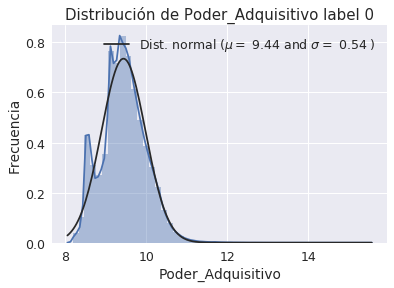

In [96]:
gmm_label0 = gmm_data[gmm_data['gmmlabel'] == 0]

sns.distplot(gmm_label0['Poder_Adquisitivo'] , fit=norm);

(mu, sigma) = norm.fit(gmm_label0['Poder_Adquisitivo'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Dist. normal ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frecuencia')
plt.title('Distribución de Poder_Adquisitivo label 0')

plt.show()


 mu = 9.95 and sigma = 0.71



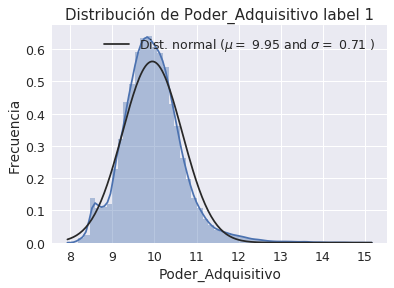

In [97]:
gmm_label1 = gmm_data[gmm_data['gmmlabel'] == 1]

sns.distplot(gmm_label1['Poder_Adquisitivo'] , fit=norm);

(mu, sigma) = norm.fit(gmm_label1['Poder_Adquisitivo'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Dist. normal ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frecuencia')
plt.title('Distribución de Poder_Adquisitivo label 1')

plt.show()

Aunque para el grupo de label 1 la distribución si que se asemeja a una distribución normal, la del grupo 0 sigue siendo similar a lo que ya teníamos. Por lo tanto rechazamos nuestra hipótesis.

## Análisis de Componentes Principales (Principal Component Analysis, PCA)

PCA es una técnica estadística de síntesis de la información, o reducción de la dimensión (número de variables). Es  decir, ante un conjunto de datos con muchas variables, el objetivo será reducirlas a un menor número perdiendo la menor 
cantidad de información posible. 

In [ ]:
from sklearn.decomposition import PCA 

model = PCA(n_components=2)            # Habría que aplicar tuning para escoger un valor óptimo
model.fit(train)                      
X_2D = model.transform(train)
pca_data = train.copy()
pca_data['PCA1'] = X_2D[:, 0]
pca_data['PCA2'] = X_2D[:, 1]
pca_data['Poder_Adquisitivo'] = y_train
sns.lmplot("PCA1", "PCA2", hue='Poder_Adquisitivo', data=pca_data, fit_reg=False);

Los nuevos componentes principales son una combinación lineal de las variables originales, y además serán independientes entre sí. 
Un aspecto clave en PCA es la interpretación de los factores, ya que ésta no viene dada a priori, sino que será deducida tras observar la relación de los factores con las variables iniciales (habrá, pues,  que  estudiar  tanto  el  signo  como  la  magnitud  de  las  correlaciones).

![](http://i65.tinypic.com/2hnyqnm.jpg)

Vemos que en la representación bidimensional, puede ser que existan 15 grupos bastante bien separados. Esto nos indica que una regresión por grupo probablemente sea efectiva en el conjunto de datos.

Esta parte la dejamos abierta de cara a un futuro, se intetaría trabajar PCA con una mayor profundiad para así entender de una mejor forma los resultados arrojados por ésta.

[1]:https://www.kdnuggets.com/2017/02/stacking-models-imropved-predictions.html
[2]:https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard

## Citas:

[1] https://www.kdnuggets.com/2017/02/stacking-models-imropved-predictions.html

[2] https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard